In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install biopython


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 26.5 MB/s eta 0:00:00


In [ ]:
from Bio import SeqIO
import pandas as pd


# Define amino acid property groups
property_groups = {
    "hydrophobicity": ["RKEDQN", "GASTPHY", "CLVIMFW"],
    "normwaalsvolume": ["GASTPD", "NVEQIL", "MHKFRYW"],
    "polarity": ["LIFWCMVY", "PATGS", "HQRKNED"],
    "polarizability": ["GASDT", "CPNVEQIL", "KMHFRYW"],
    "charge": ["KR", "ANCQGHILMFPSTWYV", "DE"],
    "secondarystruct": ["EALMQKRH", "VIYCWFT", "GNPSD"],
    "solventaccess": ["ALFCGIVW", "RKQEND", "MPSTHY"]
}

# Compute composition
def compute_composition(sequence, group):
    counts = [sum(sequence.count(aa) for aa in group[i]) for i in range(3)]
    total = sum(counts)
    return [count / total if total > 0 else 0 for count in counts]

# Compute transition
def compute_transition(sequence, group):
    transitions = [0, 0, 0]
    for i in range(len(sequence) - 1):
        for j in range(3):
            if sequence[i] in group[j]:
                if sequence[i + 1] in group[(j + 1) % 3]:
                    transitions[j] += 1
                elif sequence[i + 1] in group[(j + 2) % 3]:
                    transitions[(j + 2) % 3] += 1
    total = sum(transitions)
    return [trans / total if total > 0 else 0 for trans in transitions]

# Compute distribution
def compute_distribution(sequence, group):
    distribution = []
    for g in range(3):
        indices = [i for i, aa in enumerate(sequence) if aa in group[g]]
        if indices:
            positions = [indices[0] + 1, indices[int(len(indices) * 0.25)] + 1 if len(indices) > 1 else indices[0] + 1,
                         indices[int(len(indices) * 0.5)] + 1, indices[int(len(indices) * 0.75)] + 1 if len(indices) > 3 else indices[-1] + 1,
                         indices[-1] + 1]
            distribution.extend([pos / len(sequence) for pos in positions])
        else:
            distribution.extend([0] * 5)
    return distribution

# Compute CTD features
def compute_ctd_features(sequence):
    features = {}
    for prop, group in property_groups.items():
        features.update({f"{prop}_composition_{i + 1}": val for i, val in enumerate(compute_composition(sequence, group))})
        features.update({f"{prop}_transition_{i + 1}": val for i, val in enumerate(compute_transition(sequence, group))})
        features.update({f"{prop}_distribution_{i * 5 + j + 1}": val for i, g in enumerate(group) for j, val in enumerate(compute_distribution(sequence, group)[i * 5:(i + 1) * 5])})
    return features

# Process FASTA file
def process_fasta(input_path, output_path):
    data = []
    for record in SeqIO.parse(input_path, "fasta"):
        features = compute_ctd_features(str(record.seq))
        data.append(features)  # Only append features, no IDs
    df = pd.DataFrame(data)
    df.to_csv(output_path, index=False)

# File paths
main_p = "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/2_CTD (Composition, Transition, Distribution)/POSITIVE_main (2) (1).fasta"
main_n = "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/2_CTD (Composition, Transition, Distribution)/NEGATIVE_main (2) (1).fasta"
validation_p = "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/2_CTD (Composition, Transition, Distribution)/POSITIVE_validation (2) (1).fasta"
validation_n = "/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/2_CTD (Composition, Transition, Distribution)/NEGATIVE_validation (2) (1).fasta"

# Output paths
output_main_p = "/content/positive_main_ctd.csv"
output_main_n = "/content/negative_main_ctd.csv"
output_validation_p = "/content/positive_validation_ctd.csv"
output_validation_n = "/content/negative_validation_ctd.csv"

# Process and save features
process_fasta(main_p, output_main_p)
process_fasta(main_n, output_main_n)
process_fasta(validation_p, output_validation_p)
process_fasta(validation_n, output_validation_n)


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


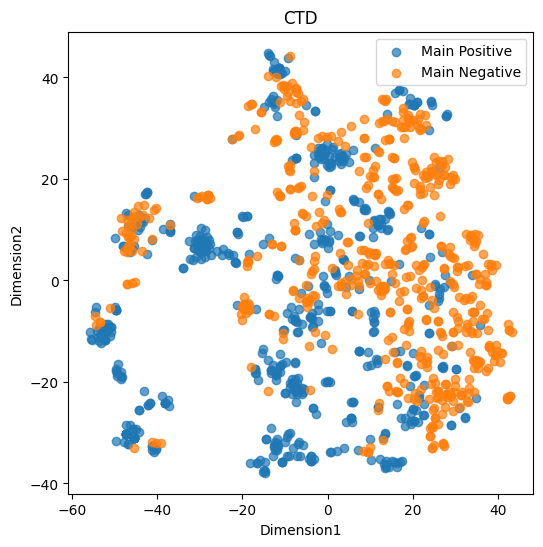

In [ ]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Load AAC features for the main dataset
main_positive = pd.read_csv("/content/positive_main_ctd.csv")
main_negative = pd.read_csv("/content/negative_main_ctd.csv")

# Add labels for the main dataset
main_positive["label"] = "Main Positive"
main_negative["label"] = "Main Negative"

# Combine main datasets into one DataFrame
main_data = pd.concat([main_positive, main_negative])

# Separate features and labels
features = main_data.drop(columns=["label"])  # Drop the label column
labels = main_data["label"]  # Keep the label column

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
tsne_results = tsne.fit_transform(features)

# Add t-SNE results back to DataFrame
main_data["t-SNE-1"] = tsne_results[:, 0]
main_data["t-SNE-2"] = tsne_results[:, 1]

# Plot the t-SNE results for main dataset
plt.figure(figsize=(6, 6))
for label in main_data["label"].unique():
    subset = main_data[main_data["label"] == label]
    plt.scatter(subset["t-SNE-1"], subset["t-SNE-2"], label=label, alpha=0.7)

plt.title("CTD")
plt.xlabel("Dimension1")
plt.ylabel("Dimension2")
plt.legend()
plt.show()


# **All Algorithm**

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
main_p = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/2_CTD (Composition, Transition, Distribution)/positive_main_ctd.csv")
main_n = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/2_CTD (Composition, Transition, Distribution)/negative_main_ctd (1).csv")
validation_p = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/2_CTD (Composition, Transition, Distribution)/positive_validation_ctd.csv")
validation_n = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/2_CTD (Composition, Transition, Distribution)/negative_validation_ctd.csv")

In [ ]:
# Label the datasets
main_p['label'] = 1
main_n['label'] = 0
validation_p['label'] = 1
validation_n['label'] = 0

# Combine datasets
train_data = pd.concat([main_p, main_n], ignore_index=True)
val_data = pd.concat([validation_p, validation_n], ignore_index=True)

# Separate features and labels
X_train = train_data.drop(columns=['label']).values
y_train = train_data['label'].values
X_val = val_data.drop(columns=['label']).values
y_val = val_data['label'].values


In [ ]:
# Dictionary of models
models = {
    "SVM": SVC(kernel='linear', probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Logistic Regression": LogisticRegression(),
    "k-NN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0),
    "AdaBoost": AdaBoostClassifier(),
    "Neural Network": Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ]),
    "MLP": Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
}


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the neural network models
models["Neural Network"].compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
models["MLP"].compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Store accuracies
results = []

# Train each model and evaluate
for name, model in models.items():
    print(f"\nTraining {name}...")

    if name in ["Neural Network", "MLP"]:
        # Neural Network training
        model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), verbose=0)
        train_pred = (model.predict(X_train) > 0.5).astype("int32")
        val_pred = (model.predict(X_val) > 0.5).astype("int32")
    else:
        # Traditional ML model training
        model.fit(X_train, y_train)
        train_pred = model.predict(X_train)
        val_pred = model.predict(X_val)

    # Calculate train and validation accuracy
    train_accuracy = accuracy_score(y_train, train_pred)
    val_accuracy = accuracy_score(y_val, val_pred)

    results.append({"Model": name, "Train Accuracy": train_accuracy, "Validation Accuracy": val_accuracy})


Training SVM...

Training Decision Tree...

Training Random Forest...

Training Logistic Regression...

Training k-NN...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Training Naive Bayes...

Training Gradient Boosting...

Training XGBoost...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:06:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Training LightGBM...
[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002390 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13392
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 147
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

Training CatBoost...

Training AdaBoost...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Training Neural Network...
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

Training MLP...
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [ ]:
# Convert to DataFrame and sort by Validation Accuracy and Train Accuracy in descending order
results_df = pd.DataFrame(results).sort_values(by=["Validation Accuracy", "Train Accuracy"], ascending=False).reset_index(drop=True)

# Display results
print("\nModel Accuracy Table (Descending Order of Validation Accuracy)")
print(results_df)


Model Accuracy Table (Descending Order of Validation Accuracy)
                  Model  Train Accuracy  Validation Accuracy
0               XGBoost        0.996564             0.923333
1              LightGBM        0.996564             0.923333
2              CatBoost        0.995704             0.923333
3     Gradient Boosting        0.992268             0.916667
4         Random Forest        0.996564             0.906667
5        Neural Network        0.994845             0.903333
6                   MLP        0.993986             0.893333
7              AdaBoost        0.915808             0.876667
8         Decision Tree        0.996564             0.840000
9                  k-NN        0.921821             0.833333
10                  SVM        0.854811             0.826667
11  Logistic Regression        0.838488             0.813333
12          Naive Bayes        0.722509             0.720000


In [ ]:
from sklearn.metrics import confusion_matrix, matthews_corrcoef, cohen_kappa_score, roc_auc_score, accuracy_score

# Store evaluation metrics
results = []

# Train each model and evaluate
for name, model in models.items():
    print(f"\nTraining {name}...")

    if name in ["Neural Network", "MLP"]:
        # Neural Network training
        model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val), verbose=0)
        train_pred = (model.predict(X_train) > 0.5).astype("int32").flatten()
        val_pred = (model.predict(X_val) > 0.5).astype("int32").flatten()
    else:
        # Traditional ML model training
        model.fit(X_train, y_train)
        train_pred = model.predict(X_train)
        val_pred = model.predict(X_val)

    # Calculate metrics for validation set
    val_accuracy = accuracy_score(y_val, val_pred)
    val_cm = confusion_matrix(y_val, val_pred)
    tn, fp, fn, tp = val_cm.ravel()

    # Metrics
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0  # Recall/TPR
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0  # TNR
    mcc = matthews_corrcoef(y_val, val_pred)
    kappa = cohen_kappa_score(y_val, val_pred)
    auc = roc_auc_score(y_val, model.predict_proba(X_val)[:, 1]) if name not in ["Neural Network", "MLP"] else roc_auc_score(y_val, model.predict(X_val).flatten())

    # Append results
    results.append({
        "Model": name,
        "Accuracy": val_accuracy,
        "Sensitivity": sensitivity,
        "Specificity": specificity,
        "MCC": mcc,
        "Kappa": kappa,
        "AUC": auc
    })

# Convert to DataFrame and sort by AUC
results_df = pd.DataFrame(results).sort_values(by=["AUC"], ascending=False).reset_index(drop=True)

# Display results
print("\nModel Performance Metrics")
print(results_df)



Training SVM...

Training Decision Tree...

Training Random Forest...

Training Logistic Regression...

Training k-NN...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Training Naive Bayes...

Training Gradient Boosting...

Training XGBoost...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:08:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Training LightGBM...
[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003184 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13392
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 147
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

Training CatBoost...

Training AdaBoost...


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Training Neural Network...
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

Training MLP...
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

Model Performance Metrics
                  Model  Accuracy  Sensitivity  Specificity       MCC  \
0               XGBoost  0.923333     0.933333     0.913333  0.846836   
1              CatBoost  0.923333     0.926667     0.920000  0.846685   
2              LightGBM  0.923333     0.933333     0.913333  0.846836   
3     Gradient Boosting  0.916667     0.946667     0.886667  0.834837   
4         Random Forest  0.910000     0.913333     0.906667  0.820018   
5                   MLP  0.890000     0.873333     0.906667  0.780434   
6        Neural Network  0.886667     0.873333     0.900000  0.773608   
7              AdaBoost  0.876667     0.906667     0.846667  0.754693   
8                  k-NN  0.833333

# CROSS VALIDATION

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, matthews_corrcoef, cohen_kappa_score, roc_auc_score, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Models dictionary
models = {
    "SVM": SVC(kernel='linear', probability=True),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Logistic Regression": LogisticRegression(),
    "k-NN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0),
    "AdaBoost": AdaBoostClassifier(),
}

# Neural Network models
def create_neural_network(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

def create_mlp(input_shape):
    model = Sequential([
        Dense(128, activation='relu', input_shape=(input_shape,)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Initialize StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store all results
results = []

# Function to calculate metrics
def calculate_metrics(y_true, y_pred, y_probs):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()

    # Metrics calculations
    accuracy = accuracy_score(y_true, y_pred)
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0  # Recall
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    mcc = matthews_corrcoef(y_true, y_pred)
    kappa = cohen_kappa_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_probs)

    return accuracy, sensitivity, specificity, mcc, kappa, auc

# Cross-validation for traditional ML models
for name, model in models.items():
    print(f"\nPerforming Cross-validation for {name}...")
    accuracies, sensitivities, specificities, mccs, kappas, aucs = [], [], [], [], [], []

    for train_index, val_index in cv.split(X_train, y_train):
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

        # Train the model
        model.fit(X_train_fold, y_train_fold)
        y_probs = model.predict_proba(X_val_fold)[:, 1]  # Probabilities for positive class
        y_pred = (y_probs > 0.5).astype(int)

        # Calculate metrics
        metrics = calculate_metrics(y_val_fold, y_pred, y_probs)
        accuracies.append(metrics[0])
        sensitivities.append(metrics[1])
        specificities.append(metrics[2])
        mccs.append(metrics[3])
        kappas.append(metrics[4])
        aucs.append(metrics[5])

    # Store mean metrics
    results.append({
        "Model": name,
        "Accuracy": np.mean(accuracies),
        "Sensitivity": np.mean(sensitivities),
        "Specificity": np.mean(specificities),
        "MCC": np.mean(mccs),
        "Kappa": np.mean(kappas),
        "AUC": np.mean(aucs),
    })

# Cross-validation for Neural Networks
for name, create_model in [("Neural Network", create_neural_network), ("MLP", create_mlp)]:
    print(f"\nPerforming Cross-validation for {name}...")
    accuracies, sensitivities, specificities, mccs, kappas, aucs = [], [], [], [], [], []

    for train_index, val_index in cv.split(X_train, y_train):
        X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
        y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

        # Create and train the model
        model = create_model(X_train.shape[1])
        model.fit(X_train_fold, y_train_fold, epochs=50, batch_size=32, verbose=0)

        y_probs = model.predict(X_val_fold).flatten()
        y_pred = (y_probs > 0.5).astype(int)

        # Calculate metrics
        metrics = calculate_metrics(y_val_fold, y_pred, y_probs)
        accuracies.append(metrics[0])
        sensitivities.append(metrics[1])
        specificities.append(metrics[2])
        mccs.append(metrics[3])
        kappas.append(metrics[4])
        aucs.append(metrics[5])

    # Store mean metrics
    results.append({
        "Model": name,
        "Accuracy": np.mean(accuracies),
        "Sensitivity": np.mean(sensitivities),
        "Specificity": np.mean(specificities),
        "MCC": np.mean(mccs),
        "Kappa": np.mean(kappas),
        "AUC": np.mean(aucs),
    })

# Convert results to DataFrame and display
results_df = pd.DataFrame(results).sort_values(by="AUC", ascending=False).reset_index(drop=True)
print("\nModel Performance Metrics")
print(results_df)



Performing Cross-validation for SVM...

Performing Cross-validation for Decision Tree...

Performing Cross-validation for Random Forest...

Performing Cross-validation for Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


Performing Cross-validation for k-NN...

Performing Cross-validation for Naive Bayes...

Performing Cross-validation for Gradient Boosting...

Performing Cross-validation for XGBoost...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:42:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:42:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:42:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:42:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:42:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e


Performing Cross-validation for LightGBM...
[LightGBM] [Info] Number of positive: 465, number of negative: 466
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001119 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12147
[LightGBM] [Info] Number of data points in the train set: 931, number of used features: 147
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499463 -> initscore=-0.002148
[LightGBM] [Info] Start training from score -0.002148
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 465, number of negative: 466
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002324 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12120
[LightGBM] [Info] Number of data points in the train set: 931,

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1


Performing Cross-validation for Neural Network...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 

Performing Cross-validation for MLP...


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

Model Performance Metrics
                  Model  Accuracy  Sensitivity  Specificity       MCC  \
0              LightGBM  0.906364     0.888270     0.924418  0.813725   
1               XGBoost  0.910652     0.893457     0.927851  0.822352   
2              CatBoost  0.910652     0.895122     0.926083  0.822013   
3         Random Forest  0.906349     0.883053     0.929546  0.813829   
4     Gradient Boosting  0.897758     0.893457     0.902063  0.796106   
5                   MLP  0.874567     0.867787     0.881462  0.752205   
6        Neural Network  0.876291     0.884836     0.867639  0.753299   
7              AdaBoost  0.863386     0.865989     0.860654  0.727620   
8                  k-NN  0.849663     0.859136     0.840127  0.700133   
9                   SVM  0.817005     0.790348     0.843531  0.635259   
10  Logistic Regression  0.817874     0.790333     0.845240  0.637439   
11        Decision Tree  0.838508     0.826348     0.850486 

# Hyperparameter optimization with Optuna

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 4.3 MB/s eta 0:00:00


In [ ]:
!pip install scikeras

In [ ]:
import pandas as pd
import optuna
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Load datasets
main_p = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/2_CTD (Composition, Transition, Distribution)/positive_main_ctd.csv")
main_n = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/2_CTD (Composition, Transition, Distribution)/negative_main_ctd (1).csv")
validation_p = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/2_CTD (Composition, Transition, Distribution)/positive_validation_ctd.csv")
validation_n = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/2_CTD (Composition, Transition, Distribution)/negative_validation_ctd.csv")

# Combine positive and negative datasets
main_data = pd.concat([main_p.assign(label=1), main_n.assign(label=0)])
validation_data = pd.concat([validation_p.assign(label=1), validation_n.assign(label=0)])

# Split features and labels
X_train = main_data.drop("label", axis=1)
y_train = main_data["label"]
X_val = validation_data.drop("label", axis=1)
y_val = validation_data["label"]



# Define models with MLP included
models = {
    "SVM": lambda trial: SVC(
        C=trial.suggest_float("C", 0.1, 10.0),
        kernel=trial.suggest_categorical("kernel", ["linear", "poly", "rbf", "sigmoid"])
    ),
    "Decision Tree": lambda trial: DecisionTreeClassifier(
        max_depth=trial.suggest_int("max_depth", 3, 20),
        min_samples_split=trial.suggest_int("min_samples_split", 2, 10)
    ),
    "Random Forest": lambda trial: RandomForestClassifier(
        n_estimators=trial.suggest_int("n_estimators", 50, 500),
        max_depth=trial.suggest_int("max_depth", 3, 20),
        min_samples_split=trial.suggest_int("min_samples_split", 2, 10)
    ),
    "Logistic Regression": lambda trial: LogisticRegression(
        C=trial.suggest_float("C", 0.1, 10.0),
        solver=trial.suggest_categorical("solver", ["lbfgs", "liblinear"])
    ),
    "k-NN": lambda trial: KNeighborsClassifier(
        n_neighbors=trial.suggest_int("n_neighbors", 3, 20)
    ),
    "Naive Bayes": lambda trial: GaussianNB(),
    "Gradient Boosting": lambda trial: GradientBoostingClassifier(
        n_estimators=trial.suggest_int("n_estimators", 50, 500),
        learning_rate=trial.suggest_float("learning_rate", 0.01, 0.5),
        max_depth=trial.suggest_int("max_depth", 3, 20)
    ),
    "XGBoost": lambda trial: XGBClassifier(
        n_estimators=trial.suggest_int("n_estimators", 50, 500),
        max_depth=trial.suggest_int("max_depth", 3, 20),
        learning_rate=trial.suggest_float("learning_rate", 0.01, 0.5),
        use_label_encoder=False,
        eval_metric="logloss"
    ),
    "LightGBM": lambda trial: LGBMClassifier(
        n_estimators=trial.suggest_int("n_estimators", 50, 500),
        max_depth=trial.suggest_int("max_depth", 3, 20),
        learning_rate=trial.suggest_float("learning_rate", 0.01, 0.5)
    ),
    "AdaBoost": lambda trial: AdaBoostClassifier(
        n_estimators=trial.suggest_int("n_estimators", 50, 500),
        learning_rate=trial.suggest_float("learning_rate", 0.01, 1.0)
    ),
    "Neural Network": lambda trial: MLPClassifier(
        hidden_layer_sizes=(
            trial.suggest_int("hidden_layer_1", 10, 100),
            trial.suggest_int("hidden_layer_2", 10, 100)
        ),
        learning_rate_init=trial.suggest_float("learning_rate_init", 0.001, 0.1),
        max_iter=200
    ),
    "MLP": lambda trial: MLPClassifier(
        hidden_layer_sizes=(
            trial.suggest_int("layer_1", 50, 150),
            trial.suggest_int("layer_2", 50, 150)
        ),
        activation=trial.suggest_categorical("activation", ["logistic", "tanh", "relu"]),
        solver=trial.suggest_categorical("solver", ["adam", "sgd"]),
        learning_rate_init=trial.suggest_float("learning_rate_init", 0.001, 0.1),
        max_iter=200,
        random_state=42
    )
}


results = []

def optimize_model(model_name, model_func):
    def objective(trial):
        model = model_func(trial)
        model.fit(X_train, y_train)
        preds = model.predict(X_val)
        return accuracy_score(y_val, preds)

    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=30)

    # Store the results
    results.append({
        "Model": model_name,
        "Accuracy": study.best_value,
        "Best Params": study.best_params
    })

# Run optimization for all models
for model_name, model_func in models.items():
    print(f"Optimizing {model_name}...")
    optimize_model(model_name, model_func)


# Convert results to a DataFrame
results_df = pd.DataFrame(results)


# Display the DataFrame
print(results_df)


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
[I 2024-12-26 16:54:16,756] A new study created in memory with name: no-name-73546062-7bb5-4b44-b91f-eb92ccab642b
[I 2024-12-26 16:54:16,892] Trial 0 finished with value: 0.8866666666666667 and parameters: {'C': 8.121295730366807, 'kernel': 'poly'}. Best is trial 0 with value: 0.8866666666666667.


Optimizing SVM...


[I 2024-12-26 16:54:16,998] Trial 1 finished with value: 0.63 and parameters: {'C': 9.652426458292238, 'kernel': 'sigmoid'}. Best is trial 0 with value: 0.8866666666666667.
[I 2024-12-26 16:54:17,133] Trial 2 finished with value: 0.8866666666666667 and parameters: {'C': 8.59564868199317, 'kernel': 'poly'}. Best is trial 0 with value: 0.8866666666666667.
[I 2024-12-26 16:54:17,273] Trial 3 finished with value: 0.8633333333333333 and parameters: {'C': 1.7469950605506173, 'kernel': 'rbf'}. Best is trial 0 with value: 0.8866666666666667.
[I 2024-12-26 16:54:17,377] Trial 4 finished with value: 0.63 and parameters: {'C': 9.527818190440472, 'kernel': 'sigmoid'}. Best is trial 0 with value: 0.8866666666666667.
[I 2024-12-26 16:54:17,482] Trial 5 finished with value: 0.8266666666666667 and parameters: {'C': 0.9265296939775653, 'kernel': 'linear'}. Best is trial 0 with value: 0.8866666666666667.
[I 2024-12-26 16:54:17,593] Trial 6 finished with value: 0.8866666666666667 and parameters: {'C': 3.

Optimizing Decision Tree...


[I 2024-12-26 16:54:21,232] Trial 2 finished with value: 0.84 and parameters: {'max_depth': 12, 'min_samples_split': 8}. Best is trial 2 with value: 0.84.
[I 2024-12-26 16:54:21,342] Trial 3 finished with value: 0.8333333333333334 and parameters: {'max_depth': 16, 'min_samples_split': 7}. Best is trial 2 with value: 0.84.
[I 2024-12-26 16:54:21,402] Trial 4 finished with value: 0.8033333333333333 and parameters: {'max_depth': 4, 'min_samples_split': 3}. Best is trial 2 with value: 0.84.
[I 2024-12-26 16:54:21,486] Trial 5 finished with value: 0.84 and parameters: {'max_depth': 8, 'min_samples_split': 5}. Best is trial 2 with value: 0.84.
[I 2024-12-26 16:54:21,537] Trial 6 finished with value: 0.8066666666666666 and parameters: {'max_depth': 4, 'min_samples_split': 6}. Best is trial 2 with value: 0.84.
[I 2024-12-26 16:54:21,628] Trial 7 finished with value: 0.8333333333333334 and parameters: {'max_depth': 9, 'min_samples_split': 8}. Best is trial 2 with value: 0.84.
[I 2024-12-26 16:5

Optimizing Random Forest...


[I 2024-12-26 16:54:26,281] Trial 0 finished with value: 0.9133333333333333 and parameters: {'n_estimators': 159, 'max_depth': 16, 'min_samples_split': 8}. Best is trial 0 with value: 0.9133333333333333.
[I 2024-12-26 16:54:30,765] Trial 1 finished with value: 0.9066666666666666 and parameters: {'n_estimators': 414, 'max_depth': 11, 'min_samples_split': 8}. Best is trial 0 with value: 0.9133333333333333.
[I 2024-12-26 16:54:33,213] Trial 2 finished with value: 0.9133333333333333 and parameters: {'n_estimators': 260, 'max_depth': 8, 'min_samples_split': 7}. Best is trial 0 with value: 0.9133333333333333.
[I 2024-12-26 16:54:36,673] Trial 3 finished with value: 0.91 and parameters: {'n_estimators': 466, 'max_depth': 19, 'min_samples_split': 8}. Best is trial 0 with value: 0.9133333333333333.
[I 2024-12-26 16:54:38,140] Trial 4 finished with value: 0.8833333333333333 and parameters: {'n_estimators': 255, 'max_depth': 6, 'min_samples_split': 8}. Best is trial 0 with value: 0.91333333333333

Optimizing Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[I 2024-12-26 16:55:38,759] Trial 1 finished with value: 0.8366666666666667 and parameters: {'C': 8.219162721261423, 'solver': 'lbfgs'}. Best is trial 1 with value: 0.8366666666666667.
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/pr

Optimizing k-NN...


[I 2024-12-26 16:55:43,501] Trial 1 finished with value: 0.8266666666666667 and parameters: {'n_neighbors': 7}. Best is trial 0 with value: 0.83.
[I 2024-12-26 16:55:43,556] Trial 2 finished with value: 0.7866666666666666 and parameters: {'n_neighbors': 18}. Best is trial 0 with value: 0.83.
[I 2024-12-26 16:55:43,608] Trial 3 finished with value: 0.7933333333333333 and parameters: {'n_neighbors': 17}. Best is trial 0 with value: 0.83.
[I 2024-12-26 16:55:43,668] Trial 4 finished with value: 0.8 and parameters: {'n_neighbors': 13}. Best is trial 0 with value: 0.83.
[I 2024-12-26 16:55:43,721] Trial 5 finished with value: 0.7966666666666666 and parameters: {'n_neighbors': 8}. Best is trial 0 with value: 0.83.
[I 2024-12-26 16:55:43,774] Trial 6 finished with value: 0.8066666666666666 and parameters: {'n_neighbors': 11}. Best is trial 0 with value: 0.83.
[I 2024-12-26 16:55:43,835] Trial 7 finished with value: 0.8033333333333333 and parameters: {'n_neighbors': 16}. Best is trial 0 with v

Optimizing Naive Bayes...


[I 2024-12-26 16:55:45,008] Trial 12 finished with value: 0.72 and parameters: {}. Best is trial 0 with value: 0.72.
[I 2024-12-26 16:55:45,022] Trial 13 finished with value: 0.72 and parameters: {}. Best is trial 0 with value: 0.72.
[I 2024-12-26 16:55:45,037] Trial 14 finished with value: 0.72 and parameters: {}. Best is trial 0 with value: 0.72.
[I 2024-12-26 16:55:45,056] Trial 15 finished with value: 0.72 and parameters: {}. Best is trial 0 with value: 0.72.
[I 2024-12-26 16:55:45,073] Trial 16 finished with value: 0.72 and parameters: {}. Best is trial 0 with value: 0.72.
[I 2024-12-26 16:55:45,086] Trial 17 finished with value: 0.72 and parameters: {}. Best is trial 0 with value: 0.72.
[I 2024-12-26 16:55:45,101] Trial 18 finished with value: 0.72 and parameters: {}. Best is trial 0 with value: 0.72.
[I 2024-12-26 16:55:45,114] Trial 19 finished with value: 0.72 and parameters: {}. Best is trial 0 with value: 0.72.
[I 2024-12-26 16:55:45,127] Trial 20 finished with value: 0.72 a

Optimizing Gradient Boosting...


[I 2024-12-26 16:56:19,937] Trial 0 finished with value: 0.8766666666666667 and parameters: {'n_estimators': 339, 'learning_rate': 0.353593858201423, 'max_depth': 15}. Best is trial 0 with value: 0.8766666666666667.
[I 2024-12-26 16:56:33,540] Trial 1 finished with value: 0.93 and parameters: {'n_estimators': 237, 'learning_rate': 0.05400604795985838, 'max_depth': 5}. Best is trial 1 with value: 0.93.
[I 2024-12-26 16:56:50,234] Trial 2 finished with value: 0.8633333333333333 and parameters: {'n_estimators': 170, 'learning_rate': 0.1261432164806637, 'max_depth': 18}. Best is trial 1 with value: 0.93.
[I 2024-12-26 16:57:01,012] Trial 3 finished with value: 0.9233333333333333 and parameters: {'n_estimators': 127, 'learning_rate': 0.43010046610386315, 'max_depth': 9}. Best is trial 1 with value: 0.93.
[I 2024-12-26 16:57:14,686] Trial 4 finished with value: 0.8466666666666667 and parameters: {'n_estimators': 136, 'learning_rate': 0.3157624119299707, 'max_depth': 20}. Best is trial 1 with

Optimizing XGBoost...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:06:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-12-26 17:06:11,562] Trial 0 finished with value: 0.92 and parameters: {'n_estimators': 401, 'max_depth': 17, 'learning_rate': 0.3054255600256089}. Best is trial 0 with value: 0.92.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:06:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-12-26 17:06:12,711] Trial 1 finished with value: 0.93 and parameters: {'n_estimators': 85, 'max_depth': 8, 'learning_rate': 0.22327904707393073}. Best is trial 1 with value: 0.93.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:06:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, 

Optimizing LightGBM...
[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004026 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13392
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 147
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

[I 2024-12-26 17:07:32,888] Trial 0 finished with value: 0.9166666666666666 and parameters: {'n_estimators': 221, 'max_depth': 13, 'learning_rate': 0.4380254917393021}. Best is trial 0 with value: 0.9166666666666666.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-12-26 17:07:34,330] Trial 1 finished with value: 0.9066666666666666 and parameters: {'n_estimators': 233, 'max_depth': 5, 'learning_rate': 0.026168537762660232}. Best is trial 0 with value: 0.9166666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003958 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Tot

[I 2024-12-26 17:07:36,210] Trial 2 finished with value: 0.92 and parameters: {'n_estimators': 445, 'max_depth': 12, 'learning_rate': 0.21147046496590813}. Best is trial 2 with value: 0.92.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004173 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13392
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 147
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

[I 2024-12-26 17:07:36,699] Trial 3 finished with value: 0.9266666666666666 and parameters: {'n_estimators': 81, 'max_depth': 7, 'learning_rate': 0.19888316520463734}. Best is trial 3 with value: 0.9266666666666666.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000904 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13392
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 147
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

[I 2024-12-26 17:07:37,722] Trial 4 finished with value: 0.9266666666666666 and parameters: {'n_estimators': 423, 'max_depth': 15, 'learning_rate': 0.2858623810135184}. Best is trial 3 with value: 0.9266666666666666.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004188 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13392
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 147
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

[I 2024-12-26 17:07:38,641] Trial 5 finished with value: 0.9133333333333333 and parameters: {'n_estimators': 402, 'max_depth': 19, 'learning_rate': 0.46241810742121725}. Best is trial 3 with value: 0.9266666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 17:07:39,393] Trial 6 finished with value: 0.9233333333333333 and parameters: {'n_estimators': 274, 'max_depth': 17, 'learning_rate': 0.4348755588804963}. Best is trial 3 with value: 0.9266666666666666.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004204 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13392
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 147
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

[I 2024-12-26 17:07:40,292] Trial 7 finished with value: 0.9166666666666666 and parameters: {'n_estimators': 392, 'max_depth': 9, 'learning_rate': 0.4895522386008428}. Best is trial 3 with value: 0.9266666666666666.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003961 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13392
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 147
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

[I 2024-12-26 17:07:40,978] Trial 8 finished with value: 0.92 and parameters: {'n_estimators': 235, 'max_depth': 12, 'learning_rate': 0.40353130221699995}. Best is trial 3 with value: 0.9266666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 17:07:42,130] Trial 9 finished with value: 0.92 and parameters: {'n_estimators': 500, 'max_depth': 19, 'learning_rate': 0.3492937198818249}. Best is trial 3 with value: 0.9266666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 17:07:42,303] Trial 10 finished with value: 0.9033333333333333 and parameters: {'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.11513938494358016}. Best is trial 3 with value: 0.9266666666666666.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002933 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13392
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 147
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

[I 2024-12-26 17:07:42,727] Trial 11 finished with value: 0.9233333333333333 and parameters: {'n_estimators': 65, 'max_depth': 8, 'learning_rate': 0.23895761930105025}. Best is trial 3 with value: 0.9266666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003562 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13392
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 147
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

[I 2024-12-26 17:07:43,362] Trial 12 finished with value: 0.9066666666666666 and parameters: {'n_estimators': 133, 'max_depth': 15, 'learning_rate': 0.31148846705353295}. Best is trial 3 with value: 0.9266666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002770 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13392
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 147
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

[I 2024-12-26 17:07:44,592] Trial 13 finished with value: 0.9266666666666666 and parameters: {'n_estimators': 348, 'max_depth': 8, 'learning_rate': 0.15658370635920357}. Best is trial 3 with value: 0.9266666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 17:07:45,194] Trial 14 finished with value: 0.9233333333333333 and parameters: {'n_estimators': 132, 'max_depth': 15, 'learning_rate': 0.3072755414739352}. Best is trial 3 with value: 0.9266666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 17:07:46,404] Trial 15 finished with value: 0.9233333333333333 and parameters: {'n_estimators': 336, 'max_depth': 6, 'learning_rate': 0.1695106858581838}. Best is trial 3 with value: 0.9266666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 17:07:47,741] Trial 16 finished with value: 0.9266666666666666 and parameters: {'n_estimators': 143, 'max_depth': 10, 'learning_rate': 0.07939326044205902}. Best is trial 3 with value: 0.9266666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006448 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13392
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 147
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

[I 2024-12-26 17:07:49,590] Trial 17 finished with value: 0.9333333333333333 and parameters: {'n_estimators': 497, 'max_depth': 15, 'learning_rate': 0.27395949638259703}. Best is trial 17 with value: 0.9333333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 17:07:51,312] Trial 18 finished with value: 0.9133333333333333 and parameters: {'n_estimators': 489, 'max_depth': 6, 'learning_rate': 0.36639028099513843}. Best is trial 17 with value: 0.9333333333333333.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-12-26 17:07:51,847] Trial 19 finished with value: 0.93 and parameters: {'n_estimators': 180, 'max_depth': 3, 'learning_rate': 0.2129967281997167}. Best is trial 17 with value: 0.9333333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002694 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Tot

[I 2024-12-26 17:07:52,307] Trial 20 finished with value: 0.91 and parameters: {'n_estimators': 199, 'max_depth': 3, 'learning_rate': 0.2492245162759146}. Best is trial 17 with value: 0.9333333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 17:07:52,771] Trial 21 finished with value: 0.9166666666666666 and parameters: {'n_estimators': 103, 'max_depth': 5, 'learning_rate': 0.19312478642944736}. Best is trial 17 with value: 0.9333333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 17:07:53,192] Trial 22 finished with value: 0.9133333333333333 and parameters: {'n_estimators': 194, 'max_depth': 3, 'learning_rate': 0.12372503119458267}. Best is trial 17 with value: 0.9333333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 17:07:53,882] Trial 23 finished with value: 0.93 and parameters: {'n_estimators': 162, 'max_depth': 7, 'learning_rate': 0.26188460868812}. Best is trial 17 with value: 0.9333333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 17:07:54,721] Trial 24 finished with value: 0.9266666666666666 and parameters: {'n_estimators': 288, 'max_depth': 10, 'learning_rate': 0.2755164003611054}. Best is trial 17 with value: 0.9333333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 17:07:55,311] Trial 25 finished with value: 0.9166666666666666 and parameters: {'n_estimators': 176, 'max_depth': 5, 'learning_rate': 0.3523023793287803}. Best is trial 17 with value: 0.9333333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 17:07:56,265] Trial 26 finished with value: 0.9333333333333333 and parameters: {'n_estimators': 280, 'max_depth': 17, 'learning_rate': 0.23399292942884153}. Best is trial 17 with value: 0.9333333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002670 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13392
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 147
[LightGBM] [Info] [binary:BoostFromScore]: 

[I 2024-12-26 17:07:57,247] Trial 27 finished with value: 0.93 and parameters: {'n_estimators': 287, 'max_depth': 17, 'learning_rate': 0.22308263534599534}. Best is trial 17 with value: 0.9333333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000855 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13392
[LightGBM] [Info] Number of data points in the train set: 1164, number o

[I 2024-12-26 17:07:58,132] Trial 28 finished with value: 0.9266666666666666 and parameters: {'n_estimators': 339, 'max_depth': 20, 'learning_rate': 0.31264418631138097}. Best is trial 17 with value: 0.9333333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 17:07:59,286] Trial 29 finished with value: 0.93 and parameters: {'n_estimators': 255, 'max_depth': 14, 'learning_rate': 0.13905041622476266}. Best is trial 17 with value: 0.9333333333333333.
[I 2024-12-26 17:07:59,289] A new study created in memory with name: no-name-272bf958-b10f-43af-821a-e2a368dbb128


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 17:08:01,439] Trial 0 finished with value: 0.8666666666666667 and parameters: {'n_estimators': 164, 'learning_rate': 0.5479061649748629}. Best is trial 0 with value: 0.8666666666666667.
[I 2024-12-26 17:08:02,794] Trial 1 finished with value: 0.8833333333333333 and parameters: {'n_estimators': 77, 'learning_rate': 0.9793943684370556}. Best is trial 1 with value: 0.8833333333333333.
[I 2024-12-26 17:08:06,010] Trial 2 finished with value: 0.8633333333333333 and parameters: {'n_estimators': 174, 'learning_rate': 0.6140387103840921}. Best is trial 1 with value: 0.8833333333333333.
[I 2024-12-26 17:08:09,163] Trial 3 finished with value: 0.8766666666666667 and parameters: {'n_estimators': 231, 'learning_rate': 0.980012345352114}. Best is trial 1 with value: 0.8833333333333333.
[I 2024-12-26 17:08:12,856] Trial 4 finished with value: 0.86 and parameters: {'n_estimators': 285, 'learning_rate': 0.9029557950260348}. Best is trial 1 with value: 0.8833333333333333.
[I 2024-12-26 17

Optimizing Neural Network...


[I 2024-12-26 17:10:11,014] Trial 0 finished with value: 0.86 and parameters: {'hidden_layer_1': 77, 'hidden_layer_2': 99, 'learning_rate_init': 0.052899022339549656}. Best is trial 0 with value: 0.86.
[I 2024-12-26 17:10:11,613] Trial 1 finished with value: 0.8466666666666667 and parameters: {'hidden_layer_1': 17, 'hidden_layer_2': 41, 'learning_rate_init': 0.03950863556599325}. Best is trial 0 with value: 0.86.
[I 2024-12-26 17:10:13,960] Trial 2 finished with value: 0.86 and parameters: {'hidden_layer_1': 98, 'hidden_layer_2': 91, 'learning_rate_init': 0.017003059859270964}. Best is trial 0 with value: 0.86.
[I 2024-12-26 17:10:16,436] Trial 3 finished with value: 0.88 and parameters: {'hidden_layer_1': 17, 'hidden_layer_2': 96, 'learning_rate_init': 0.019258502710981777}. Best is trial 3 with value: 0.88.
[I 2024-12-26 17:10:17,301] Trial 4 finished with value: 0.8233333333333334 and parameters: {'hidden_layer_1': 14, 'hidden_layer_2': 25, 'learning_rate_init': 0.08324219180431369}

Optimizing MLP...


[I 2024-12-26 17:11:10,843] Trial 0 finished with value: 0.8766666666666667 and parameters: {'layer_1': 136, 'layer_2': 125, 'activation': 'relu', 'solver': 'adam', 'learning_rate_init': 0.020528454925092043}. Best is trial 0 with value: 0.8766666666666667.
[I 2024-12-26 17:11:12,343] Trial 1 finished with value: 0.85 and parameters: {'layer_1': 135, 'layer_2': 135, 'activation': 'relu', 'solver': 'sgd', 'learning_rate_init': 0.09957410509838807}. Best is trial 0 with value: 0.8766666666666667.
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
[I 2024-12-26 17:11:23,942] Trial 2 finished with value: 0.8966666666666666 and parameters: {'layer_1': 145, 'layer_2': 97, 'activation': 'tanh', 'solver': 'sgd', 'learning_rate_init': 0.0795211513462322}. Best is trial 2 with value: 0.8966666666666666.
[I 2024-12-26 17:

                  Model  Accuracy  \
0                   SVM  0.890000   
1         Decision Tree  0.870000   
2         Random Forest  0.923333   
3   Logistic Regression  0.836667   
4                  k-NN  0.840000   
5           Naive Bayes  0.720000   
6     Gradient Boosting  0.933333   
7               XGBoost  0.936667   
8              LightGBM  0.933333   
9              AdaBoost  0.883333   
10       Neural Network  0.906667   
11                  MLP  0.913333   

                                          Best Params  
0           {'C': 5.89516692029373, 'kernel': 'poly'}  
1           {'max_depth': 18, 'min_samples_split': 2}  
2   {'n_estimators': 170, 'max_depth': 15, 'min_sa...  
3         {'C': 8.219162721261423, 'solver': 'lbfgs'}  
4                                  {'n_neighbors': 4}  
5                                                  {}  
6   {'n_estimators': 350, 'learning_rate': 0.45284...  
7   {'n_estimators': 188, 'max_depth': 12, 'learni...  
8   {'n_estima

In [ ]:

from sklearn.metrics import (
    confusion_matrix,
    roc_auc_score,
    matthews_corrcoef,
    cohen_kappa_score,
    accuracy_score,
)


# Function to calculate metrics
def calculate_metrics(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    mcc = matthews_corrcoef(y_true, y_pred)
    kappa = cohen_kappa_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)
    return {
        "Accuracy": accuracy,
        "Sensitivity": sensitivity,
        "Specificity": specificity,
        "MCC": mcc,
        "Kappa": kappa,
        "AUC": auc,
    }

# Define models with hyperparameters
models = {
    "SVM": lambda trial: SVC(
        C=trial.suggest_float("C", 0.1, 10.0),
        kernel=trial.suggest_categorical("kernel", ["linear", "poly", "rbf", "sigmoid"]),
    ),
    "Decision Tree": lambda trial: DecisionTreeClassifier(
        max_depth=trial.suggest_int("max_depth", 3, 20),
        min_samples_split=trial.suggest_int("min_samples_split", 2, 10),
    ),
    "Random Forest": lambda trial: RandomForestClassifier(
        n_estimators=trial.suggest_int("n_estimators", 50, 500),
        max_depth=trial.suggest_int("max_depth", 3, 20),
        min_samples_split=trial.suggest_int("min_samples_split", 2, 10),
    ),
    "Logistic Regression": lambda trial: LogisticRegression(
        C=trial.suggest_float("C", 0.1, 10.0),
        solver=trial.suggest_categorical("solver", ["lbfgs", "liblinear"]),
    ),
    "k-NN": lambda trial: KNeighborsClassifier(
        n_neighbors=trial.suggest_int("n_neighbors", 3, 20)
    ),
    "Naive Bayes": lambda trial: GaussianNB(),
    "Gradient Boosting": lambda trial: GradientBoostingClassifier(
        n_estimators=trial.suggest_int("n_estimators", 50, 500),
        learning_rate=trial.suggest_float("learning_rate", 0.01, 0.5),
        max_depth=trial.suggest_int("max_depth", 3, 20),
    ),
    "XGBoost": lambda trial: XGBClassifier(
        n_estimators=trial.suggest_int("n_estimators", 50, 500),
        max_depth=trial.suggest_int("max_depth", 3, 20),
        learning_rate=trial.suggest_float("learning_rate", 0.01, 0.5),
        use_label_encoder=False,
        eval_metric="logloss",
    ),
    "LightGBM": lambda trial: LGBMClassifier(
        n_estimators=trial.suggest_int("n_estimators", 50, 500),
        max_depth=trial.suggest_int("max_depth", 3, 20),
        learning_rate=trial.suggest_float("learning_rate", 0.01, 0.5),
    ),
    "AdaBoost": lambda trial: AdaBoostClassifier(
        n_estimators=trial.suggest_int("n_estimators", 50, 500),
        learning_rate=trial.suggest_float("learning_rate", 0.01, 1.0),
    ),
    "MLP": lambda trial: MLPClassifier(
        hidden_layer_sizes=(
            trial.suggest_int("layer_1", 50, 150),
            trial.suggest_int("layer_2", 50, 150),
        ),
        activation=trial.suggest_categorical("activation", ["logistic", "tanh", "relu"]),
        solver=trial.suggest_categorical("solver", ["adam", "sgd"]),
        learning_rate_init=trial.suggest_float("learning_rate_init", 0.001, 0.1),
        max_iter=200,
        random_state=42,
    ),
}

# Results storage
results = []

# Optimization function
def optimize_model_with_metrics(model_name, model_func):
    def objective(trial):
        model = model_func(trial)
        model.fit(X_train, y_train)
        preds = model.predict(X_val)
        trial.set_user_attr("preds", preds)
        metrics = calculate_metrics(y_val, preds)
        return metrics["Accuracy"]

    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=30)

    # Store the best trial metrics
    best_trial_preds = study.best_trial.user_attrs["preds"]
    best_metrics = calculate_metrics(y_val, best_trial_preds)
    best_metrics["Best Params"] = study.best_params
    results.append(best_metrics)

# Run optimization for all models
for model_name, model_func in models.items():
    print(f"Optimizing {model_name}...")
    optimize_model_with_metrics(model_name, model_func)

# Store the final results with selected metrics and best parameters
final_results = []
for result in results:
    final_results.append(
        {
            "Model": result.get("Model"),
            "Accuracy": result["Accuracy"],
            "Sensitivity": result["Sensitivity"],
            "Specificity": result["Specificity"],
            "MCC": result["MCC"],
            "Kappa": result["Kappa"],
            "AUC": result["AUC"],
            "Best Params": result["Best Params"],
        }
    )

# Convert results to a DataFrame and display it
final_results_df = pd.DataFrame(final_results)
print(final_results_df)


[I 2024-12-26 17:50:53,797] A new study created in memory with name: no-name-aec1f364-d1d6-4b5f-a778-29679cb60f34


Optimizing SVM...


[I 2024-12-26 17:50:54,261] Trial 0 finished with value: 0.8666666666666667 and parameters: {'C': 3.9754557019421415, 'kernel': 'rbf'}. Best is trial 0 with value: 0.8666666666666667.
[I 2024-12-26 17:50:54,472] Trial 1 finished with value: 0.8866666666666667 and parameters: {'C': 6.7955968917744425, 'kernel': 'poly'}. Best is trial 1 with value: 0.8866666666666667.
[I 2024-12-26 17:50:54,862] Trial 2 finished with value: 0.8366666666666667 and parameters: {'C': 6.071554529134953, 'kernel': 'linear'}. Best is trial 1 with value: 0.8866666666666667.
[I 2024-12-26 17:50:55,038] Trial 3 finished with value: 0.87 and parameters: {'C': 6.251982317482115, 'kernel': 'rbf'}. Best is trial 1 with value: 0.8866666666666667.
[I 2024-12-26 17:50:55,184] Trial 4 finished with value: 0.88 and parameters: {'C': 0.9324765785414132, 'kernel': 'poly'}. Best is trial 1 with value: 0.8866666666666667.
[I 2024-12-26 17:50:55,487] Trial 5 finished with value: 0.8433333333333334 and parameters: {'C': 4.86124

Optimizing Decision Tree...


[I 2024-12-26 17:51:00,428] Trial 1 finished with value: 0.8266666666666667 and parameters: {'max_depth': 11, 'min_samples_split': 8}. Best is trial 0 with value: 0.8466666666666667.
[I 2024-12-26 17:51:00,539] Trial 2 finished with value: 0.8366666666666667 and parameters: {'max_depth': 19, 'min_samples_split': 8}. Best is trial 0 with value: 0.8466666666666667.
[I 2024-12-26 17:51:00,650] Trial 3 finished with value: 0.8333333333333334 and parameters: {'max_depth': 14, 'min_samples_split': 7}. Best is trial 0 with value: 0.8466666666666667.
[I 2024-12-26 17:51:00,755] Trial 4 finished with value: 0.8333333333333334 and parameters: {'max_depth': 11, 'min_samples_split': 6}. Best is trial 0 with value: 0.8466666666666667.
[I 2024-12-26 17:51:00,858] Trial 5 finished with value: 0.8433333333333334 and parameters: {'max_depth': 9, 'min_samples_split': 6}. Best is trial 0 with value: 0.8466666666666667.
[I 2024-12-26 17:51:00,966] Trial 6 finished with value: 0.83 and parameters: {'max_de

Optimizing Random Forest...


[I 2024-12-26 17:51:05,518] Trial 0 finished with value: 0.85 and parameters: {'n_estimators': 418, 'max_depth': 4, 'min_samples_split': 2}. Best is trial 0 with value: 0.85.
[I 2024-12-26 17:51:08,153] Trial 1 finished with value: 0.92 and parameters: {'n_estimators': 360, 'max_depth': 10, 'min_samples_split': 3}. Best is trial 1 with value: 0.92.
[I 2024-12-26 17:51:10,076] Trial 2 finished with value: 0.9133333333333333 and parameters: {'n_estimators': 224, 'max_depth': 15, 'min_samples_split': 3}. Best is trial 1 with value: 0.92.
[I 2024-12-26 17:51:11,855] Trial 3 finished with value: 0.8966666666666666 and parameters: {'n_estimators': 164, 'max_depth': 16, 'min_samples_split': 8}. Best is trial 1 with value: 0.92.
[I 2024-12-26 17:51:13,526] Trial 4 finished with value: 0.92 and parameters: {'n_estimators': 153, 'max_depth': 19, 'min_samples_split': 7}. Best is trial 1 with value: 0.92.
[I 2024-12-26 17:51:14,506] Trial 5 finished with value: 0.9066666666666666 and parameters: {

Optimizing Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[I 2024-12-26 17:52:18,669] Trial 2 finished with value: 0.83 and parameters: {'C': 2.2279536313553354, 'solver': 'lbfgs'}. Best is trial 1 with value: 0.8333333333333334.
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.h

Optimizing k-NN...


[I 2024-12-26 17:52:21,497] Trial 4 finished with value: 0.8 and parameters: {'n_neighbors': 13}. Best is trial 0 with value: 0.8333333333333334.
[I 2024-12-26 17:52:21,540] Trial 5 finished with value: 0.8033333333333333 and parameters: {'n_neighbors': 10}. Best is trial 0 with value: 0.8333333333333334.
[I 2024-12-26 17:52:21,579] Trial 6 finished with value: 0.8066666666666666 and parameters: {'n_neighbors': 12}. Best is trial 0 with value: 0.8333333333333334.
[I 2024-12-26 17:52:21,617] Trial 7 finished with value: 0.8066666666666666 and parameters: {'n_neighbors': 15}. Best is trial 0 with value: 0.8333333333333334.
[I 2024-12-26 17:52:21,657] Trial 8 finished with value: 0.7866666666666666 and parameters: {'n_neighbors': 18}. Best is trial 0 with value: 0.8333333333333334.
[I 2024-12-26 17:52:21,696] Trial 9 finished with value: 0.78 and parameters: {'n_neighbors': 20}. Best is trial 0 with value: 0.8333333333333334.
[I 2024-12-26 17:52:21,742] Trial 10 finished with value: 0.833

Optimizing Naive Bayes...


[I 2024-12-26 17:52:22,917] Trial 8 finished with value: 0.72 and parameters: {}. Best is trial 0 with value: 0.72.
[I 2024-12-26 17:52:22,943] Trial 9 finished with value: 0.72 and parameters: {}. Best is trial 0 with value: 0.72.
[I 2024-12-26 17:52:22,964] Trial 10 finished with value: 0.72 and parameters: {}. Best is trial 0 with value: 0.72.
[I 2024-12-26 17:52:22,983] Trial 11 finished with value: 0.72 and parameters: {}. Best is trial 0 with value: 0.72.
[I 2024-12-26 17:52:23,003] Trial 12 finished with value: 0.72 and parameters: {}. Best is trial 0 with value: 0.72.
[I 2024-12-26 17:52:23,022] Trial 13 finished with value: 0.72 and parameters: {}. Best is trial 0 with value: 0.72.
[I 2024-12-26 17:52:23,042] Trial 14 finished with value: 0.72 and parameters: {}. Best is trial 0 with value: 0.72.
[I 2024-12-26 17:52:23,061] Trial 15 finished with value: 0.72 and parameters: {}. Best is trial 0 with value: 0.72.
[I 2024-12-26 17:52:23,082] Trial 16 finished with value: 0.72 and

Optimizing Gradient Boosting...


[I 2024-12-26 17:52:37,725] Trial 0 finished with value: 0.9333333333333333 and parameters: {'n_estimators': 224, 'learning_rate': 0.3273298871627546, 'max_depth': 5}. Best is trial 0 with value: 0.9333333333333333.
[I 2024-12-26 17:53:12,676] Trial 1 finished with value: 0.86 and parameters: {'n_estimators': 370, 'learning_rate': 0.07943703578145592, 'max_depth': 16}. Best is trial 0 with value: 0.9333333333333333.
[I 2024-12-26 17:53:32,159] Trial 2 finished with value: 0.8666666666666667 and parameters: {'n_estimators': 222, 'learning_rate': 0.15360022066249868, 'max_depth': 15}. Best is trial 0 with value: 0.9333333333333333.
[I 2024-12-26 17:54:13,543] Trial 3 finished with value: 0.8666666666666667 and parameters: {'n_estimators': 440, 'learning_rate': 0.07586706960722593, 'max_depth': 17}. Best is trial 0 with value: 0.9333333333333333.
[I 2024-12-26 17:54:55,126] Trial 4 finished with value: 0.8733333333333333 and parameters: {'n_estimators': 366, 'learning_rate': 0.01612832656

Optimizing XGBoost...


[I 2024-12-26 18:00:45,592] Trial 0 finished with value: 0.9266666666666666 and parameters: {'n_estimators': 452, 'max_depth': 14, 'learning_rate': 0.3029295053300658}. Best is trial 0 with value: 0.9266666666666666.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:00:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-12-26 18:00:47,282] Trial 1 finished with value: 0.9266666666666666 and parameters: {'n_estimators': 422, 'max_depth': 11, 'learning_rate': 0.451750459951132}. Best is trial 0 with value: 0.9266666666666666.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:00:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-12-26 18:00:48,192] Trial 2 finished with value: 0.9333333333333333 and parameters: {'n_estimators': 86, 'max_depth': 14, 'learning_rat

Optimizing LightGBM...
[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002744 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13392
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 147
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

[I 2024-12-26 18:01:50,976] Trial 0 finished with value: 0.9266666666666666 and parameters: {'n_estimators': 281, 'max_depth': 14, 'learning_rate': 0.36709027902691804}. Best is trial 0 with value: 0.9266666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002945 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13392
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 147
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

[I 2024-12-26 18:01:51,878] Trial 1 finished with value: 0.92 and parameters: {'n_estimators': 266, 'max_depth': 18, 'learning_rate': 0.43221312352043617}. Best is trial 0 with value: 0.9266666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 18:01:53,519] Trial 2 finished with value: 0.9233333333333333 and parameters: {'n_estimators': 416, 'max_depth': 12, 'learning_rate': 0.2831915436455895}. Best is trial 0 with value: 0.9266666666666666.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-12-26 18:01:54,652] Trial 3 finished with value: 0.9266666666666666 and parameters: {'n_estimators': 199, 'max_depth': 17, 'learning_rate': 0.23039292912612994}. Best is trial 0 with value: 0.9266666666666666.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-12-26 18:01:56,103] Trial 4 finished with value: 0.9233333333333333 and parameters: {'n_estimators': 256, 'max_depth': 7, 'learning_rate': 0.20145954682202277}. Best is trial 0 with value: 0.9266666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 18:01:57,140] Trial 5 finished with value: 0.9266666666666666 and parameters: {'n_estimators': 259, 'max_depth': 5, 'learning_rate': 0.24023620132964507}. Best is trial 0 with value: 0.9266666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 18:01:57,827] Trial 6 finished with value: 0.9266666666666666 and parameters: {'n_estimators': 231, 'max_depth': 5, 'learning_rate': 0.39557208890047324}. Best is trial 0 with value: 0.9266666666666666.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000862 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13392
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 147
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

[I 2024-12-26 18:01:58,365] Trial 7 finished with value: 0.9233333333333333 and parameters: {'n_estimators': 233, 'max_depth': 4, 'learning_rate': 0.4755112826477647}. Best is trial 0 with value: 0.9266666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 18:01:59,053] Trial 8 finished with value: 0.9333333333333333 and parameters: {'n_estimators': 241, 'max_depth': 8, 'learning_rate': 0.4584778472534251}. Best is trial 8 with value: 0.9333333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 18:02:00,294] Trial 9 finished with value: 0.9166666666666666 and parameters: {'n_estimators': 408, 'max_depth': 18, 'learning_rate': 0.18888375401054608}. Best is trial 8 with value: 0.9333333333333333.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000899 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13392
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 147
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2024-12-26 18:02:00,672] Trial 10 finished with value: 0.8866666666666667 and parameters: {'n_estimators': 56, 'max_depth': 9, 'learning_rate': 0.023555448487940778}. Best is trial 8 with value: 0.9333333333333333.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002845 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13392
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 147
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

[I 2024-12-26 18:02:01,612] Trial 11 finished with value: 0.9166666666666666 and parameters: {'n_estimators': 358, 'max_depth': 14, 'learning_rate': 0.3633273484340487}. Best is trial 8 with value: 0.9333333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 18:02:02,129] Trial 12 finished with value: 0.93 and parameters: {'n_estimators': 139, 'max_depth': 10, 'learning_rate': 0.4928598643356048}. Best is trial 8 with value: 0.9333333333333333.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002902 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13392
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 147
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-12-26 18:02:02,615] Trial 13 finished with value: 0.9066666666666666 and parameters: {'n_estimators': 121, 'max_depth': 9, 'learning_rate': 0.4978316911416327}. Best is trial 8 with value: 0.9333333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 18:02:03,263] Trial 14 finished with value: 0.92 and parameters: {'n_estimators': 156, 'max_depth': 10, 'learning_rate': 0.32087603046951607}. Best is trial 8 with value: 0.9333333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 18:02:04,398] Trial 15 finished with value: 0.9233333333333333 and parameters: {'n_estimators': 491, 'max_depth': 12, 'learning_rate': 0.44654197990478695}. Best is trial 8 with value: 0.9333333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 18:02:04,916] Trial 16 finished with value: 0.9266666666666666 and parameters: {'n_estimators': 86, 'max_depth': 7, 'learning_rate': 0.13155077458185202}. Best is trial 8 with value: 0.9333333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002944 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13392
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 147
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

[I 2024-12-26 18:02:05,501] Trial 17 finished with value: 0.92 and parameters: {'n_estimators': 173, 'max_depth': 7, 'learning_rate': 0.41501512721759093}. Best is trial 8 with value: 0.9333333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 18:02:06,461] Trial 18 finished with value: 0.9233333333333333 and parameters: {'n_estimators': 330, 'max_depth': 15, 'learning_rate': 0.31580019218547123}. Best is trial 8 with value: 0.9333333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 18:02:06,959] Trial 19 finished with value: 0.9033333333333333 and parameters: {'n_estimators': 136, 'max_depth': 3, 'learning_rate': 0.46937690287380734}. Best is trial 8 with value: 0.9333333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 18:02:09,146] Trial 20 finished with value: 0.9333333333333333 and parameters: {'n_estimators': 309, 'max_depth': 11, 'learning_rate': 0.10509834132889201}. Best is trial 8 with value: 0.9333333333333333.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003929 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13392
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 147
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

[I 2024-12-26 18:02:12,099] Trial 21 finished with value: 0.9366666666666666 and parameters: {'n_estimators': 364, 'max_depth': 11, 'learning_rate': 0.06775278936304979}. Best is trial 21 with value: 0.9366666666666666.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002834 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13392
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 147
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-12-26 18:02:14,120] Trial 22 finished with value: 0.9266666666666666 and parameters: {'n_estimators': 321, 'max_depth': 11, 'learning_rate': 0.050311639842573405}. Best is trial 21 with value: 0.9366666666666666.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000840 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13392
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 147
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

[I 2024-12-26 18:02:15,699] Trial 23 finished with value: 0.93 and parameters: {'n_estimators': 394, 'max_depth': 13, 'learning_rate': 0.09520453325383285}. Best is trial 21 with value: 0.9366666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 18:02:17,030] Trial 24 finished with value: 0.9266666666666666 and parameters: {'n_estimators': 314, 'max_depth': 20, 'learning_rate': 0.12678563300860296}. Best is trial 21 with value: 0.9366666666666666.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000885 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13392
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 147
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

[I 2024-12-26 18:02:18,952] Trial 25 finished with value: 0.9266666666666666 and parameters: {'n_estimators': 372, 'max_depth': 8, 'learning_rate': 0.0683559103833085}. Best is trial 21 with value: 0.9366666666666666.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002808 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13392
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 147
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

[I 2024-12-26 18:02:20,379] Trial 26 finished with value: 0.92 and parameters: {'n_estimators': 464, 'max_depth': 11, 'learning_rate': 0.1614087470073696}. Best is trial 21 with value: 0.9366666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 18:02:22,082] Trial 27 finished with value: 0.93 and parameters: {'n_estimators': 292, 'max_depth': 16, 'learning_rate': 0.0902858847624381}. Best is trial 21 with value: 0.9366666666666666.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-12-26 18:02:25,428] Trial 28 finished with value: 0.9266666666666666 and parameters: {'n_estimators': 356, 'max_depth': 9, 'learning_rate': 0.02156248249282812}. Best is trial 21 with value: 0.9366666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005599 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13392
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 147
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

[I 2024-12-26 18:02:27,586] Trial 29 finished with value: 0.9366666666666666 and parameters: {'n_estimators': 452, 'max_depth': 13, 'learning_rate': 0.13276301739302993}. Best is trial 21 with value: 0.9366666666666666.
[I 2024-12-26 18:02:27,599] A new study created in memory with name: no-name-0a255952-57e6-4120-acf8-3b68aa77fe56


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Optimizing AdaBoost...


[I 2024-12-26 18:02:30,199] Trial 0 finished with value: 0.8633333333333333 and parameters: {'n_estimators': 196, 'learning_rate': 0.5751886243874101}. Best is trial 0 with value: 0.8633333333333333.
[I 2024-12-26 18:02:32,039] Trial 1 finished with value: 0.8366666666666667 and parameters: {'n_estimators': 139, 'learning_rate': 0.3695468586848066}. Best is trial 0 with value: 0.8633333333333333.
[I 2024-12-26 18:02:34,315] Trial 2 finished with value: 0.8666666666666667 and parameters: {'n_estimators': 173, 'learning_rate': 0.8456806468577338}. Best is trial 2 with value: 0.8666666666666667.
[I 2024-12-26 18:02:37,241] Trial 3 finished with value: 0.84 and parameters: {'n_estimators': 221, 'learning_rate': 0.1597239334759169}. Best is trial 2 with value: 0.8666666666666667.
[I 2024-12-26 18:02:43,479] Trial 4 finished with value: 0.87 and parameters: {'n_estimators': 372, 'learning_rate': 0.66202054431445}. Best is trial 4 with value: 0.87.
[I 2024-12-26 18:02:44,402] Trial 5 finished

Optimizing MLP...


[I 2024-12-26 18:05:04,483] Trial 0 finished with value: 0.5 and parameters: {'layer_1': 94, 'layer_2': 116, 'activation': 'tanh', 'solver': 'adam', 'learning_rate_init': 0.09363916299039292}. Best is trial 0 with value: 0.5.
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
[I 2024-12-26 18:05:12,060] Trial 1 finished with value: 0.81 and parameters: {'layer_1': 106, 'layer_2': 113, 'activation': 'logistic', 'solver': 'sgd', 'learning_rate_init': 0.01775927248339517}. Best is trial 1 with value: 0.81.
[I 2024-12-26 18:05:14,116] Trial 2 finished with value: 0.8933333333333333 and parameters: {'layer_1': 82, 'layer_2': 59, 'activation': 'logistic', 'solver': 'adam', 'learning_rate_init': 0.07293787356853744}. Best is trial 2 with value: 0.8933333333333333.
[I 2024-12-26 18:05:15,356] Trial 3 finished with valu

   Model  Accuracy  Sensitivity  Specificity       MCC     Kappa       AUC  \
0   None  0.890000     0.893333     0.886667  0.780017  0.780000  0.890000   
1   None  0.870000     0.880000     0.860000  0.740148  0.740000  0.870000   
2   None  0.930000     0.933333     0.926667  0.860019  0.860000  0.930000   
3   None  0.840000     0.853333     0.826667  0.680242  0.680000  0.840000   
4   None  0.840000     0.773333     0.906667  0.686126  0.680000  0.840000   
5   None  0.720000     0.646667     0.793333  0.444810  0.440000  0.720000   
6   None  0.936667     0.946667     0.926667  0.873508  0.873333  0.936667   
7   None  0.936667     0.946667     0.926667  0.873508  0.873333  0.936667   
8   None  0.936667     0.940000     0.933333  0.873353  0.873333  0.936667   
9   None  0.886667     0.913333     0.860000  0.774436  0.773333  0.886667   
10  None  0.893333     0.906667     0.880000  0.786947  0.786667  0.893333   

                                          Best Params  
0      

In [ ]:
import pandas as pd
import optuna
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Define models
models = {
    "SVM": lambda trial: SVC(probability=True, C=trial.suggest_float("C", 0.1, 10.0), kernel=trial.suggest_categorical("kernel", ["linear", "poly", "rbf", "sigmoid"])),
    "Decision Tree": lambda trial: DecisionTreeClassifier(max_depth=trial.suggest_int("max_depth", 3, 20), min_samples_split=trial.suggest_int("min_samples_split", 2, 10)),
    "Random Forest": lambda trial: RandomForestClassifier(n_estimators=trial.suggest_int("n_estimators", 50, 500), max_depth=trial.suggest_int("max_depth", 3, 20), min_samples_split=trial.suggest_int("min_samples_split", 2, 10)),
    "Logistic Regression": lambda trial: LogisticRegression(C=trial.suggest_float("C", 0.1, 10.0), solver=trial.suggest_categorical("solver", ["lbfgs", "liblinear"])),
    "k-NN": lambda trial: KNeighborsClassifier(n_neighbors=trial.suggest_int("n_neighbors", 3, 20)),
    "Naive Bayes": lambda trial: GaussianNB(),
    "Gradient Boosting": lambda trial: GradientBoostingClassifier(n_estimators=trial.suggest_int("n_estimators", 50, 500), learning_rate=trial.suggest_float("learning_rate", 0.01, 0.5), max_depth=trial.suggest_int("max_depth", 3, 20)),
    "XGBoost": lambda trial: XGBClassifier(n_estimators=trial.suggest_int("n_estimators", 50, 500), max_depth=trial.suggest_int("max_depth", 3, 20), learning_rate=trial.suggest_float("learning_rate", 0.01, 0.5), use_label_encoder=False, eval_metric="logloss"),
    "LightGBM": lambda trial: LGBMClassifier(n_estimators=trial.suggest_int("n_estimators", 50, 500), max_depth=trial.suggest_int("max_depth", 3, 20), learning_rate=trial.suggest_float("learning_rate", 0.01, 0.5)),
    "AdaBoost": lambda trial: AdaBoostClassifier(n_estimators=trial.suggest_int("n_estimators", 50, 500), learning_rate=trial.suggest_float("learning_rate", 0.01, 1.0)),
    "Neural Network": lambda trial: MLPClassifier(hidden_layer_sizes=(trial.suggest_int("hidden_layer_1", 10, 100), trial.suggest_int("hidden_layer_2", 10, 100)), learning_rate_init=trial.suggest_float("learning_rate_init", 0.001, 0.1), max_iter=200),
    "MLP": lambda trial: MLPClassifier(hidden_layer_sizes=(trial.suggest_int("layer_1", 50, 150), trial.suggest_int("layer_2", 50, 150)), activation=trial.suggest_categorical("activation", ["logistic", "tanh", "relu"]), solver=trial.suggest_categorical("solver", ["adam", "sgd"]), learning_rate_init=trial.suggest_float("learning_rate_init", 0.001, 0.1), max_iter=200, random_state=42)
}

# Prepare a dictionary to store model probabilities horizontally
probabilities = {"Target": y_val}  # Starting with the target column (y_val)

# Run optimization and compute probabilities for each model
for model_name, model_func in models.items():
    print(f"Optimizing {model_name}...")
    study = optuna.create_study(direction="maximize")

    # Objective function for Optuna
    def objective(trial):
        model = model_func(trial)
        model.fit(X_train, y_train)
        return accuracy_score(y_val, model.predict(X_val))

    study.optimize(objective, n_trials=30)

    # Train the best model using the best hyperparameters
    best_model = model_func(study.best_trial)
    best_model.fit(X_train, y_train)

    # Get predicted probabilities for the positive class (class 1)
    probs = best_model.predict_proba(X_val)[:, 1]

    # Add to the probabilities dictionary
    probabilities[model_name] = probs

# Convert the probabilities dictionary to a DataFrame
probability_df = pd.DataFrame(probabilities)

# Save the probability dataset to a CSV file
probability_df.to_csv("N_CTD_OPTUNA_probability_predictions.csv", index=False)

print("Dataset saved successfully!")


[I 2024-12-26 17:27:16,170] A new study created in memory with name: no-name-eac4f511-7916-41b4-ad35-ad1620fd1f46


Optimizing SVM...


[I 2024-12-26 17:27:16,796] Trial 0 finished with value: 0.8266666666666667 and parameters: {'C': 0.47975895248334866, 'kernel': 'rbf'}. Best is trial 0 with value: 0.8266666666666667.
[I 2024-12-26 17:27:17,485] Trial 1 finished with value: 0.8466666666666667 and parameters: {'C': 4.097403245733765, 'kernel': 'linear'}. Best is trial 1 with value: 0.8466666666666667.
[I 2024-12-26 17:27:18,032] Trial 2 finished with value: 0.87 and parameters: {'C': 2.6150569875604286, 'kernel': 'rbf'}. Best is trial 2 with value: 0.87.
[I 2024-12-26 17:27:18,493] Trial 3 finished with value: 0.6266666666666667 and parameters: {'C': 4.628129914917699, 'kernel': 'sigmoid'}. Best is trial 2 with value: 0.87.
[I 2024-12-26 17:27:19,442] Trial 4 finished with value: 0.8433333333333334 and parameters: {'C': 7.532722409896386, 'kernel': 'linear'}. Best is trial 2 with value: 0.87.
[I 2024-12-26 17:27:19,886] Trial 5 finished with value: 0.62 and parameters: {'C': 6.628163487163572, 'kernel': 'sigmoid'}. Bes

Optimizing Decision Tree...


[I 2024-12-26 17:27:35,287] Trial 2 finished with value: 0.8366666666666667 and parameters: {'max_depth': 10, 'min_samples_split': 5}. Best is trial 2 with value: 0.8366666666666667.
[I 2024-12-26 17:27:35,328] Trial 3 finished with value: 0.78 and parameters: {'max_depth': 3, 'min_samples_split': 5}. Best is trial 2 with value: 0.8366666666666667.
[I 2024-12-26 17:27:35,399] Trial 4 finished with value: 0.8233333333333334 and parameters: {'max_depth': 6, 'min_samples_split': 10}. Best is trial 2 with value: 0.8366666666666667.
[I 2024-12-26 17:27:35,500] Trial 5 finished with value: 0.84 and parameters: {'max_depth': 10, 'min_samples_split': 9}. Best is trial 5 with value: 0.84.
[I 2024-12-26 17:27:35,561] Trial 6 finished with value: 0.8 and parameters: {'max_depth': 5, 'min_samples_split': 2}. Best is trial 5 with value: 0.84.
[I 2024-12-26 17:27:35,663] Trial 7 finished with value: 0.8433333333333334 and parameters: {'max_depth': 11, 'min_samples_split': 4}. Best is trial 7 with va

Optimizing Random Forest...


[I 2024-12-26 17:27:39,620] Trial 0 finished with value: 0.9033333333333333 and parameters: {'n_estimators': 50, 'max_depth': 10, 'min_samples_split': 2}. Best is trial 0 with value: 0.9033333333333333.
[I 2024-12-26 17:27:41,643] Trial 1 finished with value: 0.9233333333333333 and parameters: {'n_estimators': 186, 'max_depth': 15, 'min_samples_split': 3}. Best is trial 1 with value: 0.9233333333333333.
[I 2024-12-26 17:27:45,340] Trial 2 finished with value: 0.9133333333333333 and parameters: {'n_estimators': 497, 'max_depth': 20, 'min_samples_split': 9}. Best is trial 1 with value: 0.9233333333333333.
[I 2024-12-26 17:27:47,248] Trial 3 finished with value: 0.9 and parameters: {'n_estimators': 302, 'max_depth': 7, 'min_samples_split': 3}. Best is trial 1 with value: 0.9233333333333333.
[I 2024-12-26 17:27:48,918] Trial 4 finished with value: 0.92 and parameters: {'n_estimators': 218, 'max_depth': 17, 'min_samples_split': 7}. Best is trial 1 with value: 0.9233333333333333.
[I 2024-12-

Optimizing Logistic Regression...


[I 2024-12-26 17:28:36,278] Trial 2 finished with value: 0.8333333333333334 and parameters: {'C': 7.764527540064713, 'solver': 'liblinear'}. Best is trial 1 with value: 0.8333333333333334.
[I 2024-12-26 17:28:36,377] Trial 3 finished with value: 0.8333333333333334 and parameters: {'C': 9.936558620317767, 'solver': 'liblinear'}. Best is trial 1 with value: 0.8333333333333334.
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[I 2024-12-26 17:28:36,455] Trial 4 finished with value: 0.8333333333333334 and parameters: {'C': 6.00484550632

Optimizing k-NN...


[I 2024-12-26 17:28:40,298] Trial 2 finished with value: 0.8033333333333333 and parameters: {'n_neighbors': 16}. Best is trial 0 with value: 0.8333333333333334.
[I 2024-12-26 17:28:40,340] Trial 3 finished with value: 0.84 and parameters: {'n_neighbors': 4}. Best is trial 3 with value: 0.84.
[I 2024-12-26 17:28:40,389] Trial 4 finished with value: 0.8 and parameters: {'n_neighbors': 13}. Best is trial 3 with value: 0.84.
[I 2024-12-26 17:28:40,435] Trial 5 finished with value: 0.8066666666666666 and parameters: {'n_neighbors': 15}. Best is trial 3 with value: 0.84.
[I 2024-12-26 17:28:40,482] Trial 6 finished with value: 0.84 and parameters: {'n_neighbors': 4}. Best is trial 3 with value: 0.84.
[I 2024-12-26 17:28:40,537] Trial 7 finished with value: 0.78 and parameters: {'n_neighbors': 19}. Best is trial 3 with value: 0.84.
[I 2024-12-26 17:28:40,588] Trial 8 finished with value: 0.8266666666666667 and parameters: {'n_neighbors': 7}. Best is trial 3 with value: 0.84.
[I 2024-12-26 17:

Optimizing Naive Bayes...


[I 2024-12-26 17:28:42,096] Trial 12 finished with value: 0.72 and parameters: {}. Best is trial 0 with value: 0.72.
[I 2024-12-26 17:28:42,112] Trial 13 finished with value: 0.72 and parameters: {}. Best is trial 0 with value: 0.72.
[I 2024-12-26 17:28:42,127] Trial 14 finished with value: 0.72 and parameters: {}. Best is trial 0 with value: 0.72.
[I 2024-12-26 17:28:42,143] Trial 15 finished with value: 0.72 and parameters: {}. Best is trial 0 with value: 0.72.
[I 2024-12-26 17:28:42,159] Trial 16 finished with value: 0.72 and parameters: {}. Best is trial 0 with value: 0.72.
[I 2024-12-26 17:28:42,175] Trial 17 finished with value: 0.72 and parameters: {}. Best is trial 0 with value: 0.72.
[I 2024-12-26 17:28:42,192] Trial 18 finished with value: 0.72 and parameters: {}. Best is trial 0 with value: 0.72.
[I 2024-12-26 17:28:42,209] Trial 19 finished with value: 0.72 and parameters: {}. Best is trial 0 with value: 0.72.
[I 2024-12-26 17:28:42,226] Trial 20 finished with value: 0.72 a

Optimizing Gradient Boosting...


[I 2024-12-26 17:29:01,661] Trial 0 finished with value: 0.92 and parameters: {'n_estimators': 436, 'learning_rate': 0.011385524562065189, 'max_depth': 4}. Best is trial 0 with value: 0.92.
[I 2024-12-26 17:29:16,420] Trial 1 finished with value: 0.9166666666666666 and parameters: {'n_estimators': 280, 'learning_rate': 0.4329203014287988, 'max_depth': 5}. Best is trial 0 with value: 0.92.
[I 2024-12-26 17:29:43,563] Trial 2 finished with value: 0.9366666666666666 and parameters: {'n_estimators': 368, 'learning_rate': 0.21280185200450058, 'max_depth': 10}. Best is trial 2 with value: 0.9366666666666666.
[I 2024-12-26 17:30:11,718] Trial 3 finished with value: 0.8733333333333333 and parameters: {'n_estimators': 246, 'learning_rate': 0.29324763858572367, 'max_depth': 14}. Best is trial 2 with value: 0.9366666666666666.
[I 2024-12-26 17:30:26,208] Trial 4 finished with value: 0.8833333333333333 and parameters: {'n_estimators': 102, 'learning_rate': 0.27952787515634636, 'max_depth': 12}. Be

Optimizing XGBoost...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-12-26 17:42:01,458] Trial 0 finished with value: 0.9433333333333334 and parameters: {'n_estimators': 175, 'max_depth': 11, 'learning_rate': 0.42555395245163485}. Best is trial 0 with value: 0.9433333333333334.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2024-12-26 17:42:02,688] Trial 1 finished with value: 0.92 and parameters: {'n_estimators': 146, 'max_depth': 19, 'learning_rate': 0.3135222953640134}. Best is trial 0 with value: 0.9433333333333334.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:42:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_enco

Optimizing LightGBM...
[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003264 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13392
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 147
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warn

[I 2024-12-26 17:44:00,760] Trial 0 finished with value: 0.9266666666666666 and parameters: {'n_estimators': 159, 'max_depth': 13, 'learning_rate': 0.19059108467012437}. Best is trial 0 with value: 0.9266666666666666.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002744 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13392
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 147
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

[I 2024-12-26 17:44:01,469] Trial 1 finished with value: 0.92 and parameters: {'n_estimators': 195, 'max_depth': 7, 'learning_rate': 0.34096065647138624}. Best is trial 0 with value: 0.9266666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005080 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13392
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 147
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

[I 2024-12-26 17:44:02,730] Trial 2 finished with value: 0.9233333333333333 and parameters: {'n_estimators': 346, 'max_depth': 15, 'learning_rate': 0.4909865413015716}. Best is trial 0 with value: 0.9266666666666666.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004148 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13392
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 147
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

[I 2024-12-26 17:44:03,363] Trial 3 finished with value: 0.92 and parameters: {'n_estimators': 104, 'max_depth': 15, 'learning_rate': 0.46456410741364035}. Best is trial 0 with value: 0.9266666666666666.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001216 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13392
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 147
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

[I 2024-12-26 17:44:04,433] Trial 4 finished with value: 0.9133333333333333 and parameters: {'n_estimators': 265, 'max_depth': 19, 'learning_rate': 0.4128974905425361}. Best is trial 0 with value: 0.9266666666666666.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-12-26 17:44:05,745] Trial 5 finished with value: 0.92 and parameters: {'n_estimators': 336, 'max_depth': 9, 'learning_rate': 0.3661791361333636}. Best is trial 0 with value: 0.9266666666666666.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No 

[I 2024-12-26 17:44:07,051] Trial 6 finished with value: 0.93 and parameters: {'n_estimators': 328, 'max_depth': 9, 'learning_rate': 0.19237763480178896}. Best is trial 6 with value: 0.93.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 17:44:08,314] Trial 7 finished with value: 0.92 and parameters: {'n_estimators': 285, 'max_depth': 16, 'learning_rate': 0.22895806263038676}. Best is trial 6 with value: 0.93.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002884 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13392
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 147
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2024-12-26 17:44:09,264] Trial 8 finished with value: 0.9266666666666666 and parameters: {'n_estimators': 149, 'max_depth': 10, 'learning_rate': 0.027616991625695538}. Best is trial 6 with value: 0.93.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000845 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13392
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 147
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2024-12-26 17:44:10,356] Trial 9 finished with value: 0.9233333333333333 and parameters: {'n_estimators': 170, 'max_depth': 20, 'learning_rate': 0.044699020518540085}. Best is trial 6 with value: 0.93.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001113 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13392
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 147
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

[I 2024-12-26 17:44:11,416] Trial 10 finished with value: 0.9133333333333333 and parameters: {'n_estimators': 461, 'max_depth': 3, 'learning_rate': 0.1574574398623832}. Best is trial 6 with value: 0.93.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 17:44:11,875] Trial 11 finished with value: 0.9233333333333333 and parameters: {'n_estimators': 52, 'max_depth': 12, 'learning_rate': 0.173143257728559}. Best is trial 6 with value: 0.93.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002731 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13392
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 147
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

[I 2024-12-26 17:44:13,229] Trial 12 finished with value: 0.9266666666666666 and parameters: {'n_estimators': 443, 'max_depth': 6, 'learning_rate': 0.2745448074879393}. Best is trial 6 with value: 0.93.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000890 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 133

[I 2024-12-26 17:44:14,983] Trial 13 finished with value: 0.93 and parameters: {'n_estimators': 385, 'max_depth': 12, 'learning_rate': 0.11721281821504853}. Best is trial 6 with value: 0.93.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing c

[I 2024-12-26 17:44:17,132] Trial 14 finished with value: 0.9233333333333333 and parameters: {'n_estimators': 396, 'max_depth': 8, 'learning_rate': 0.11129971535970949}. Best is trial 6 with value: 0.93.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008531 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13392
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 147
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

[I 2024-12-26 17:44:19,396] Trial 15 finished with value: 0.93 and parameters: {'n_estimators': 387, 'max_depth': 4, 'learning_rate': 0.09136472605564405}. Best is trial 6 with value: 0.93.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010422 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13392
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 147
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

[I 2024-12-26 17:44:21,018] Trial 16 finished with value: 0.93 and parameters: {'n_estimators': 269, 'max_depth': 11, 'learning_rate': 0.27111735819885313}. Best is trial 6 with value: 0.93.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 17:44:23,212] Trial 17 finished with value: 0.9333333333333333 and parameters: {'n_estimators': 321, 'max_depth': 13, 'learning_rate': 0.10940962348505405}. Best is trial 17 with value: 0.9333333333333333.



[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004133 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13392
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 147
[LightGBM] [Info] [binary:BoostFromScore]:

[I 2024-12-26 17:44:24,619] Trial 18 finished with value: 0.9233333333333333 and parameters: {'n_estimators': 238, 'max_depth': 5, 'learning_rate': 0.07392337002957776}. Best is trial 17 with value: 0.9333333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002768 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13392
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 147
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits 

[I 2024-12-26 17:44:25,659] Trial 19 finished with value: 0.93 and parameters: {'n_estimators': 322, 'max_depth': 14, 'learning_rate': 0.22028165553155876}. Best is trial 17 with value: 0.9333333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 17:44:27,154] Trial 20 finished with value: 0.9266666666666666 and parameters: {'n_estimators': 496, 'max_depth': 17, 'learning_rate': 0.14074667511699213}. Best is trial 17 with value: 0.9333333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 17:44:28,546] Trial 21 finished with value: 0.9366666666666666 and parameters: {'n_estimators': 383, 'max_depth': 11, 'learning_rate': 0.11834108917985324}. Best is trial 21 with value: 0.9366666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 17:44:30,363] Trial 22 finished with value: 0.92 and parameters: {'n_estimators': 312, 'max_depth': 10, 'learning_rate': 0.07444232273931498}. Best is trial 21 with value: 0.9366666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 17:44:31,480] Trial 23 finished with value: 0.9266666666666666 and parameters: {'n_estimators': 422, 'max_depth': 8, 'learning_rate': 0.309884558493293}. Best is trial 21 with value: 0.9366666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 17:44:33,721] Trial 24 finished with value: 0.92 and parameters: {'n_estimators': 358, 'max_depth': 11, 'learning_rate': 0.012171802309158458}. Best is trial 21 with value: 0.9366666666666666.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000873 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13392
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 147
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

[I 2024-12-26 17:44:34,545] Trial 25 finished with value: 0.9266666666666666 and parameters: {'n_estimators': 215, 'max_depth': 13, 'learning_rate': 0.21164910761664438}. Best is trial 21 with value: 0.9366666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 17:44:36,331] Trial 26 finished with value: 0.9333333333333333 and parameters: {'n_estimators': 298, 'max_depth': 9, 'learning_rate': 0.15014369237655936}. Best is trial 21 with value: 0.9366666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 17:44:38,260] Trial 27 finished with value: 0.9333333333333333 and parameters: {'n_estimators': 296, 'max_depth': 17, 'learning_rate': 0.13251731245479348}. Best is trial 21 with value: 0.9366666666666666.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004361 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13392
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 147
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2024-12-26 17:44:40,213] Trial 28 finished with value: 0.9266666666666666 and parameters: {'n_estimators': 247, 'max_depth': 13, 'learning_rate': 0.06029892986836505}. Best is trial 21 with value: 0.9366666666666666.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002821 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13392
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 147
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

[I 2024-12-26 17:44:41,537] Trial 29 finished with value: 0.92 and parameters: {'n_estimators': 413, 'max_depth': 10, 'learning_rate': 0.17079520483366817}. Best is trial 21 with value: 0.9366666666666666.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003236 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13392
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 147
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

[I 2024-12-26 17:44:43,060] A new study created in memory with name: no-name-e4576795-728d-4db4-84e7-56c7aa3bd577


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2024-12-26 17:44:48,571] Trial 0 finished with value: 0.8766666666666667 and parameters: {'n_estimators': 424, 'learning_rate': 0.7238811103148002}. Best is trial 0 with value: 0.8766666666666667.
[I 2024-12-26 17:44:51,570] Trial 1 finished with value: 0.8733333333333333 and parameters: {'n_estimators': 179, 'learning_rate': 0.9686801169385743}. Best is trial 0 with value: 0.8766666666666667.
[I 2024-12-26 17:44:53,814] Trial 2 finished with value: 0.8133333333333334 and parameters: {'n_estimators': 119, 'learning_rate': 0.11758345790290807}. Best is trial 0 with value: 0.8766666666666667.
[I 2024-12-26 17:44:58,577] Trial 3 finished with value: 0.8566666666666667 and parameters: {'n_estimators': 363, 'learning_rate': 0.352226143406642}. Best is trial 0 with value: 0.8766666666666667.
[I 2024-12-26 17:45:01,230] Trial 4 finished with value: 0.8433333333333334 and parameters: {'n_estimators': 204, 'learning_rate': 0.3571147754830744}. Best is trial 0 with value: 0.8766666666666667.


Optimizing Neural Network...


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
[I 2024-12-26 17:46:40,556] Trial 0 finished with value: 0.8733333333333333 and parameters: {'hidden_layer_1': 54, 'hidden_layer_2': 61, 'learning_rate_init': 0.0010462723693836517}. Best is trial 0 with value: 0.8733333333333333.
[I 2024-12-26 17:46:41,319] Trial 1 finished with value: 0.8733333333333333 and parameters: {'hidden_layer_1': 23, 'hidden_layer_2': 45, 'learning_rate_init': 0.06125516835971507}. Best is trial 0 with value: 0.8733333333333333.
[I 2024-12-26 17:46:42,267] Trial 2 finished with value: 0.84 and parameters: {'hidden_layer_1': 84, 'hidden_layer_2': 53, 'learning_rate_init': 0.026178498343811384}. Best is trial 0 with value: 0.8733333333333333.
[I 2024-12-26 17:46:43,026] Trial 3 finished with value: 0.83 and parameters: {'hidden_layer_1'

Optimizing MLP...


[I 2024-12-26 17:47:32,270] Trial 0 finished with value: 0.85 and parameters: {'layer_1': 94, 'layer_2': 58, 'activation': 'relu', 'solver': 'adam', 'learning_rate_init': 0.05094875838953922}. Best is trial 0 with value: 0.85.
[I 2024-12-26 17:47:33,839] Trial 1 finished with value: 0.8666666666666667 and parameters: {'layer_1': 70, 'layer_2': 63, 'activation': 'relu', 'solver': 'adam', 'learning_rate_init': 0.06728431914146264}. Best is trial 1 with value: 0.8666666666666667.
[I 2024-12-26 17:47:37,229] Trial 2 finished with value: 0.8666666666666667 and parameters: {'layer_1': 65, 'layer_2': 62, 'activation': 'relu', 'solver': 'sgd', 'learning_rate_init': 0.023296607233421956}. Best is trial 1 with value: 0.8666666666666667.
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
[I 2024-12-26 17:47:44,126] Trial 

Dataset saved successfully!


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Class Feature Vector (CFV)

In [ ]:
import optuna
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Load datasets
main_p = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/2_CTD (Composition, Transition, Distribution)/positive_main_ctd.csv")
main_n = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/2_CTD (Composition, Transition, Distribution)/negative_main_ctd (1).csv")
validation_p = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/2_CTD (Composition, Transition, Distribution)/positive_validation_ctd.csv")
validation_n = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/2_CTD (Composition, Transition, Distribution)/negative_validation_ctd.csv")

# Combine positive and negative datasets
main_data = pd.concat([main_p.assign(label=1), main_n.assign(label=0)])
validation_data = pd.concat([validation_p.assign(label=1), validation_n.assign(label=0)])

# Split features and labels
X_train = main_data.drop("label", axis=1)
y_train = main_data["label"]
X_val = validation_data.drop("label", axis=1)
y_val = validation_data["label"]

# Define models with hyperparameter optimization (Optuna)
models = {
    "SVM": lambda trial: SVC(
         probability=True,
        C=trial.suggest_float("C", 0.1, 10.0),
        kernel=trial.suggest_categorical("kernel", ["linear", "poly", "rbf", "sigmoid"])
    ),
    "Decision Tree": lambda trial: DecisionTreeClassifier(
        max_depth=trial.suggest_int("max_depth", 3, 20),
        min_samples_split=trial.suggest_int("min_samples_split", 2, 10)
    ),
    "Random Forest": lambda trial: RandomForestClassifier(
        n_estimators=trial.suggest_int("n_estimators", 50, 500),
        max_depth=trial.suggest_int("max_depth", 3, 20),
        min_samples_split=trial.suggest_int("min_samples_split", 2, 10)
    ),
    "Logistic Regression": lambda trial: LogisticRegression(
        C=trial.suggest_float("C", 0.1, 10.0),
        solver=trial.suggest_categorical("solver", ["lbfgs", "liblinear"])
    ),
    "k-NN": lambda trial: KNeighborsClassifier(
        n_neighbors=trial.suggest_int("n_neighbors", 3, 20)
    ),
    "Naive Bayes": lambda trial: GaussianNB(),
    "Gradient Boosting": lambda trial: GradientBoostingClassifier(
        n_estimators=trial.suggest_int("n_estimators", 50, 500),
        learning_rate=trial.suggest_float("learning_rate", 0.01, 0.5),
        max_depth=trial.suggest_int("max_depth", 3, 20)
    ),
    "XGBoost": lambda trial: XGBClassifier(
        n_estimators=trial.suggest_int("n_estimators", 50, 500),
        max_depth=trial.suggest_int("max_depth", 3, 20),
        learning_rate=trial.suggest_float("learning_rate", 0.01, 0.5),
        use_label_encoder=False,
        eval_metric="logloss"
    ),
    "LightGBM": lambda trial: LGBMClassifier(
        n_estimators=trial.suggest_int("n_estimators", 50, 500),
        max_depth=trial.suggest_int("max_depth", 3, 20),
        learning_rate=trial.suggest_float("learning_rate", 0.01, 0.5)
    ),
    "AdaBoost": lambda trial: AdaBoostClassifier(
        n_estimators=trial.suggest_int("n_estimators", 50, 500),
        learning_rate=trial.suggest_float("learning_rate", 0.01, 1.0)
    ),
    "Neural Network": lambda trial: MLPClassifier(
        hidden_layer_sizes=(
            trial.suggest_int("hidden_layer_1", 10, 100),
            trial.suggest_int("hidden_layer_2", 10, 100)
        ),
        learning_rate_init=trial.suggest_float("learning_rate_init", 0.001, 0.1),
        max_iter=200
    ),
    "MLP": lambda trial: MLPClassifier(
        hidden_layer_sizes=(
            trial.suggest_int("layer_1", 50, 150),
            trial.suggest_int("layer_2", 50, 150)
        ),
        activation=trial.suggest_categorical("activation", ["logistic", "tanh", "relu"]),
        solver=trial.suggest_categorical("solver", ["adam", "sgd"]),
        learning_rate_init=trial.suggest_float("learning_rate_init", 0.001, 0.1),
        max_iter=200,
        random_state=42
    )
}

# Initialize a list to store the CFV data
cfv_data = []

# Define the optimization and prediction function
def optimize_and_predict(model_name, model_func):
    def objective(trial):
        model = model_func(trial)
        model.fit(X_train, y_train)
        preds = model.predict_proba(X_val)[:, 1]  # Get probability for class 1 (positive)
        return accuracy_score(y_val, model.predict(X_val))

    # Perform optimization with Optuna
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=30)

    # Return the best model
    best_model = model_func(study.best_trial)
    best_model.fit(X_train, y_train)
    preds = best_model.predict_proba(X_val)[:, 1]  # Using the probability for class 1 (positive)

    # Append predictions to CFV list
    return preds

# Train each model and generate predictions for CFV
for model_name, model_func in models.items():
    print(f"Training and predicting with {model_name}...")
    preds = optimize_and_predict(model_name, model_func)
    cfv_data.append(preds)

# Convert the CFV data into a DataFrame
cfv_df = pd.DataFrame(np.array(cfv_data).T, columns=models.keys())

# Optionally, add the true labels column
cfv_df["True_Label"] = y_val.values

# Save the CFV dataset to CSV
cfv_df.to_csv("CFV_CTD.csv", index=False)
print("CFV dataset created and saved!")


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
[I 2025-01-15 16:15:00,524] A new study created in memory with name: no-name-bba676e7-45e4-41de-992b-fbf1d102abd1


Training and predicting with SVM...


[I 2025-01-15 16:15:01,140] Trial 0 finished with value: 0.8666666666666667 and parameters: {'C': 2.171650292524042, 'kernel': 'rbf'}. Best is trial 0 with value: 0.8666666666666667.
[I 2025-01-15 16:15:01,912] Trial 1 finished with value: 0.5366666666666666 and parameters: {'C': 1.2706231438852578, 'kernel': 'sigmoid'}. Best is trial 0 with value: 0.8666666666666667.
[I 2025-01-15 16:15:02,798] Trial 2 finished with value: 0.8433333333333334 and parameters: {'C': 7.387133770400763, 'kernel': 'linear'}. Best is trial 0 with value: 0.8666666666666667.
[I 2025-01-15 16:15:03,709] Trial 3 finished with value: 0.5366666666666666 and parameters: {'C': 1.044193355375356, 'kernel': 'sigmoid'}. Best is trial 0 with value: 0.8666666666666667.
[I 2025-01-15 16:15:04,237] Trial 4 finished with value: 0.8833333333333333 and parameters: {'C': 9.225498739699473, 'kernel': 'poly'}. Best is trial 4 with value: 0.8833333333333333.
[I 2025-01-15 16:15:04,789] Trial 5 finished with value: 0.8866666666666

Training and predicting with Decision Tree...


[I 2025-01-15 16:15:21,768] Trial 2 finished with value: 0.8166666666666667 and parameters: {'max_depth': 6, 'min_samples_split': 9}. Best is trial 0 with value: 0.8333333333333334.
[I 2025-01-15 16:15:21,872] Trial 3 finished with value: 0.8366666666666667 and parameters: {'max_depth': 19, 'min_samples_split': 7}. Best is trial 3 with value: 0.8366666666666667.
[I 2025-01-15 16:15:21,914] Trial 4 finished with value: 0.78 and parameters: {'max_depth': 3, 'min_samples_split': 6}. Best is trial 3 with value: 0.8366666666666667.
[I 2025-01-15 16:15:21,976] Trial 5 finished with value: 0.8 and parameters: {'max_depth': 5, 'min_samples_split': 9}. Best is trial 3 with value: 0.8366666666666667.
[I 2025-01-15 16:15:22,063] Trial 6 finished with value: 0.8333333333333334 and parameters: {'max_depth': 8, 'min_samples_split': 9}. Best is trial 3 with value: 0.8366666666666667.
[I 2025-01-15 16:15:22,140] Trial 7 finished with value: 0.82 and parameters: {'max_depth': 6, 'min_samples_split': 2}

Training and predicting with Random Forest...


[I 2025-01-15 16:15:28,489] Trial 0 finished with value: 0.89 and parameters: {'n_estimators': 496, 'max_depth': 6, 'min_samples_split': 6}. Best is trial 0 with value: 0.89.
[I 2025-01-15 16:15:30,429] Trial 1 finished with value: 0.91 and parameters: {'n_estimators': 185, 'max_depth': 10, 'min_samples_split': 9}. Best is trial 1 with value: 0.91.
[I 2025-01-15 16:15:32,213] Trial 2 finished with value: 0.9166666666666666 and parameters: {'n_estimators': 232, 'max_depth': 18, 'min_samples_split': 6}. Best is trial 2 with value: 0.9166666666666666.
[I 2025-01-15 16:15:34,562] Trial 3 finished with value: 0.9033333333333333 and parameters: {'n_estimators': 374, 'max_depth': 7, 'min_samples_split': 3}. Best is trial 2 with value: 0.9166666666666666.
[I 2025-01-15 16:15:35,417] Trial 4 finished with value: 0.9066666666666666 and parameters: {'n_estimators': 109, 'max_depth': 18, 'min_samples_split': 6}. Best is trial 2 with value: 0.9166666666666666.
[I 2025-01-15 16:15:36,081] Trial 5 fi

Training and predicting with Logistic Regression...


[I 2025-01-15 16:16:13,675] Trial 1 finished with value: 0.8133333333333334 and parameters: {'C': 0.9183590108082023, 'solver': 'liblinear'}. Best is trial 0 with value: 0.8333333333333334.
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[I 2025-01-15 16:16:13,836] Trial 2 finished with value: 0.8366666666666667 and parameters: {'C': 3.7989743875989377, 'solver': 'lbfgs'}. Best is trial 2 with value: 0.8366666666666667.
[I 2025-01-15 16:16:13,983] Trial 3 finished with value: 0.8333333333333334 and parameters: {'C': 2.7231563934788

Training and predicting with k-NN...


[I 2025-01-15 16:16:17,314] Trial 2 finished with value: 0.8033333333333333 and parameters: {'n_neighbors': 10}. Best is trial 0 with value: 0.84.
[I 2025-01-15 16:16:17,366] Trial 3 finished with value: 0.8033333333333333 and parameters: {'n_neighbors': 16}. Best is trial 0 with value: 0.84.
[I 2025-01-15 16:16:17,411] Trial 4 finished with value: 0.78 and parameters: {'n_neighbors': 19}. Best is trial 0 with value: 0.84.
[I 2025-01-15 16:16:17,453] Trial 5 finished with value: 0.83 and parameters: {'n_neighbors': 6}. Best is trial 0 with value: 0.84.
[I 2025-01-15 16:16:17,509] Trial 6 finished with value: 0.8033333333333333 and parameters: {'n_neighbors': 10}. Best is trial 0 with value: 0.84.
[I 2025-01-15 16:16:17,553] Trial 7 finished with value: 0.7933333333333333 and parameters: {'n_neighbors': 17}. Best is trial 0 with value: 0.84.
[I 2025-01-15 16:16:17,595] Trial 8 finished with value: 0.7966666666666666 and parameters: {'n_neighbors': 8}. Best is trial 0 with value: 0.84.
[

Training and predicting with Naive Bayes...


[I 2025-01-15 16:16:18,922] Trial 10 finished with value: 0.72 and parameters: {}. Best is trial 0 with value: 0.72.
[I 2025-01-15 16:16:18,938] Trial 11 finished with value: 0.72 and parameters: {}. Best is trial 0 with value: 0.72.
[I 2025-01-15 16:16:18,961] Trial 12 finished with value: 0.72 and parameters: {}. Best is trial 0 with value: 0.72.
[I 2025-01-15 16:16:18,982] Trial 13 finished with value: 0.72 and parameters: {}. Best is trial 0 with value: 0.72.
[I 2025-01-15 16:16:18,998] Trial 14 finished with value: 0.72 and parameters: {}. Best is trial 0 with value: 0.72.
[I 2025-01-15 16:16:19,015] Trial 15 finished with value: 0.72 and parameters: {}. Best is trial 0 with value: 0.72.
[I 2025-01-15 16:16:19,035] Trial 16 finished with value: 0.72 and parameters: {}. Best is trial 0 with value: 0.72.
[I 2025-01-15 16:16:19,054] Trial 17 finished with value: 0.72 and parameters: {}. Best is trial 0 with value: 0.72.
[I 2025-01-15 16:16:19,072] Trial 18 finished with value: 0.72 a

Training and predicting with Gradient Boosting...


[I 2025-01-15 16:16:36,921] Trial 0 finished with value: 0.8666666666666667 and parameters: {'n_estimators': 213, 'learning_rate': 0.20498700962151392, 'max_depth': 12}. Best is trial 0 with value: 0.8666666666666667.
[I 2025-01-15 16:17:18,919] Trial 1 finished with value: 0.8966666666666666 and parameters: {'n_estimators': 495, 'learning_rate': 0.14924025889632406, 'max_depth': 15}. Best is trial 1 with value: 0.8966666666666666.
[I 2025-01-15 16:17:33,900] Trial 2 finished with value: 0.87 and parameters: {'n_estimators': 166, 'learning_rate': 0.3363205021131966, 'max_depth': 17}. Best is trial 1 with value: 0.8966666666666666.
[I 2025-01-15 16:17:56,427] Trial 3 finished with value: 0.94 and parameters: {'n_estimators': 428, 'learning_rate': 0.36227595600465445, 'max_depth': 6}. Best is trial 3 with value: 0.94.
[I 2025-01-15 16:18:21,728] Trial 4 finished with value: 0.8933333333333333 and parameters: {'n_estimators': 313, 'learning_rate': 0.23209202173361762, 'max_depth': 13}. Be

Training and predicting with XGBoost...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:28:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-01-15 16:28:11,149] Trial 0 finished with value: 0.9166666666666666 and parameters: {'n_estimators': 92, 'max_depth': 3, 'learning_rate': 0.3242066808976811}. Best is trial 0 with value: 0.9166666666666666.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:28:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
[I 2025-01-15 16:28:17,916] Trial 1 finished with value: 0.92 and parameters: {'n_estimators': 207, 'max_depth': 18, 'learning_rate': 0.01549329791254947}. Best is trial 1 with value: 0.92.
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:28:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not u

Training and predicting with LightGBM...
[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002867 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13392
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 147
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[I 2025-01-15 16:29:20,332] Trial 0 finished with value: 0.9266666666666666 and parameters: {'n_estimators': 143, 'max_depth': 19, 'learning_rate': 0.4364115928005147}. Best is trial 0 with value: 0.9266666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-15 16:29:21,829] Trial 1 finished with value: 0.9166666666666666 and parameters: {'n_estimators': 436, 'max_depth': 18, 'learning_rate': 0.44395053514369}. Best is trial 0 with value: 0.9266666666666666.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004085 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13392
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 147
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

[I 2025-01-15 16:29:25,011] Trial 2 finished with value: 0.9266666666666666 and parameters: {'n_estimators': 416, 'max_depth': 9, 'learning_rate': 0.06891479989734019}. Best is trial 0 with value: 0.9266666666666666.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004287 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13392
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 147
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

[I 2025-01-15 16:29:26,137] Trial 3 finished with value: 0.9166666666666666 and parameters: {'n_estimators': 402, 'max_depth': 12, 'learning_rate': 0.38368264815915876}. Best is trial 0 with value: 0.9266666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002887 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13392
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 147
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

[I 2025-01-15 16:29:27,147] Trial 4 finished with value: 0.9033333333333333 and parameters: {'n_estimators': 449, 'max_depth': 10, 'learning_rate': 0.48322779213291944}. Best is trial 0 with value: 0.9266666666666666.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002911 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13392
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 147
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2025-01-15 16:29:27,592] Trial 5 finished with value: 0.9133333333333333 and parameters: {'n_estimators': 63, 'max_depth': 12, 'learning_rate': 0.0667459745309843}. Best is trial 0 with value: 0.9266666666666666.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002914 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13392
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 147
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

[I 2025-01-15 16:29:28,098] Trial 6 finished with value: 0.9233333333333333 and parameters: {'n_estimators': 141, 'max_depth': 14, 'learning_rate': 0.48818478859640174}. Best is trial 0 with value: 0.9266666666666666.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000897 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13392
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 147
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

[I 2025-01-15 16:29:29,226] Trial 7 finished with value: 0.9233333333333333 and parameters: {'n_estimators': 471, 'max_depth': 14, 'learning_rate': 0.2528159269707707}. Best is trial 0 with value: 0.9266666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-15 16:29:30,458] Trial 8 finished with value: 0.9266666666666666 and parameters: {'n_estimators': 408, 'max_depth': 11, 'learning_rate': 0.1569197568157558}. Best is trial 0 with value: 0.9266666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-15 16:29:32,213] Trial 9 finished with value: 0.9266666666666666 and parameters: {'n_estimators': 291, 'max_depth': 8, 'learning_rate': 0.01914135105145938}. Best is trial 0 with value: 0.9266666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000860 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13392
[LightGBM] [Info] Number of data points in the train set: 1164, number o

[I 2025-01-15 16:29:32,890] Trial 10 finished with value: 0.92 and parameters: {'n_estimators': 214, 'max_depth': 20, 'learning_rate': 0.3142276067767334}. Best is trial 0 with value: 0.9266666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-15 16:29:33,550] Trial 11 finished with value: 0.92 and parameters: {'n_estimators': 306, 'max_depth': 3, 'learning_rate': 0.187157526378891}. Best is trial 0 with value: 0.9266666666666666.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-15 16:29:34,267] Trial 12 finished with value: 0.92 and parameters: {'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.34241836549902954}. Best is trial 0 with value: 0.9266666666666666.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002820 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13392
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 147
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

[I 2025-01-15 16:29:35,820] Trial 13 finished with value: 0.93 and parameters: {'n_estimators': 343, 'max_depth': 17, 'learning_rate': 0.12216775353788459}. Best is trial 13 with value: 0.93.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001214 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13392
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 147
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

[I 2025-01-15 16:29:37,518] Trial 14 finished with value: 0.93 and parameters: {'n_estimators': 344, 'max_depth': 17, 'learning_rate': 0.20033917797380935}. Best is trial 13 with value: 0.93.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003979 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13392
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 147
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

[I 2025-01-15 16:29:39,371] Trial 15 finished with value: 0.93 and parameters: {'n_estimators': 352, 'max_depth': 16, 'learning_rate': 0.15910504424847546}. Best is trial 13 with value: 0.93.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-15 16:29:40,909] Trial 16 finished with value: 0.9266666666666666 and parameters: {'n_estimators': 367, 'max_depth': 17, 'learning_rate': 0.23965308141878}. Best is trial 13 with value: 0.93.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-15 16:29:42,386] Trial 17 finished with value: 0.93 and parameters: {'n_estimators': 335, 'max_depth': 16, 'learning_rate': 0.11338611451053887}. Best is trial 13 with value: 0.93.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-15 16:29:43,219] Trial 18 finished with value: 0.92 and parameters: {'n_estimators': 242, 'max_depth': 14, 'learning_rate': 0.21266323819018362}. Best is trial 13 with value: 0.93.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-15 16:29:44,042] Trial 19 finished with value: 0.9233333333333333 and parameters: {'n_estimators': 264, 'max_depth': 20, 'learning_rate': 0.2937169884944426}. Best is trial 13 with value: 0.93.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-15 16:29:45,552] Trial 20 finished with value: 0.9333333333333333 and parameters: {'n_estimators': 491, 'max_depth': 15, 'learning_rate': 0.12611206329256627}. Best is trial 20 with value: 0.9333333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002854 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13392
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 147
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

[I 2025-01-15 16:29:47,272] Trial 21 finished with value: 0.9266666666666666 and parameters: {'n_estimators': 494, 'max_depth': 16, 'learning_rate': 0.11450066039890157}. Best is trial 20 with value: 0.9333333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-15 16:29:48,690] Trial 22 finished with value: 0.9266666666666666 and parameters: {'n_estimators': 370, 'max_depth': 18, 'learning_rate': 0.13210288148736457}. Best is trial 20 with value: 0.9333333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-15 16:29:50,721] Trial 23 finished with value: 0.9266666666666666 and parameters: {'n_estimators': 334, 'max_depth': 14, 'learning_rate': 0.06411230711384727}. Best is trial 20 with value: 0.9333333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-15 16:29:52,324] Trial 24 finished with value: 0.92 and parameters: {'n_estimators': 315, 'max_depth': 15, 'learning_rate': 0.19844843033443033}. Best is trial 20 with value: 0.9333333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-15 16:29:56,671] Trial 25 finished with value: 0.9266666666666666 and parameters: {'n_estimators': 494, 'max_depth': 18, 'learning_rate': 0.02006859908363047}. Best is trial 20 with value: 0.9333333333333333.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002954 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13392
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 147
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

[I 2025-01-15 16:29:58,459] Trial 26 finished with value: 0.9333333333333333 and parameters: {'n_estimators': 378, 'max_depth': 13, 'learning_rate': 0.08859275791949824}. Best is trial 20 with value: 0.9333333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-15 16:30:00,186] Trial 27 finished with value: 0.93 and parameters: {'n_estimators': 380, 'max_depth': 13, 'learning_rate': 0.09070633185535475}. Best is trial 20 with value: 0.9333333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-01-15 16:30:01,605] Trial 28 finished with value: 0.9233333333333333 and parameters: {'n_estimators': 451, 'max_depth': 11, 'learning_rate': 0.1613322362996254}. Best is trial 20 with value: 0.9333333333333333.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002780 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13392
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 147
[LightGBM] [Info] [binary:BoostFromScore]: 

[I 2025-01-15 16:30:04,110] Trial 29 finished with value: 0.9266666666666666 and parameters: {'n_estimators': 397, 'max_depth': 13, 'learning_rate': 0.040944148034193606}. Best is trial 20 with value: 0.9333333333333333.


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000882 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13392
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 147
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

[I 2025-01-15 16:30:05,577] A new study created in memory with name: no-name-4abe2b1c-2541-45f7-87ea-65ad8e38387e


Training and predicting with AdaBoost...


[I 2025-01-15 16:30:07,954] Trial 0 finished with value: 0.83 and parameters: {'n_estimators': 132, 'learning_rate': 0.18357957185729237}. Best is trial 0 with value: 0.83.
[I 2025-01-15 16:30:13,007] Trial 1 finished with value: 0.8333333333333334 and parameters: {'n_estimators': 311, 'learning_rate': 0.09651902080901277}. Best is trial 1 with value: 0.8333333333333334.
[I 2025-01-15 16:30:19,420] Trial 2 finished with value: 0.8566666666666667 and parameters: {'n_estimators': 477, 'learning_rate': 0.3360351263850965}. Best is trial 2 with value: 0.8566666666666667.
[I 2025-01-15 16:30:24,873] Trial 3 finished with value: 0.8666666666666667 and parameters: {'n_estimators': 322, 'learning_rate': 0.611146645653351}. Best is trial 3 with value: 0.8666666666666667.
[I 2025-01-15 16:30:31,142] Trial 4 finished with value: 0.8666666666666667 and parameters: {'n_estimators': 446, 'learning_rate': 0.46343693075811204}. Best is trial 3 with value: 0.8666666666666667.
[I 2025-01-15 16:30:35,229

Training and predicting with Neural Network...


[I 2025-01-15 16:32:20,032] Trial 0 finished with value: 0.8566666666666667 and parameters: {'hidden_layer_1': 91, 'hidden_layer_2': 68, 'learning_rate_init': 0.0865303243009559}. Best is trial 0 with value: 0.8566666666666667.
[I 2025-01-15 16:32:21,448] Trial 1 finished with value: 0.8366666666666667 and parameters: {'hidden_layer_1': 12, 'hidden_layer_2': 60, 'learning_rate_init': 0.05467421100361255}. Best is trial 0 with value: 0.8566666666666667.
[I 2025-01-15 16:32:24,145] Trial 2 finished with value: 0.8233333333333334 and parameters: {'hidden_layer_1': 44, 'hidden_layer_2': 98, 'learning_rate_init': 0.09294266192717841}. Best is trial 0 with value: 0.8566666666666667.
[I 2025-01-15 16:32:26,629] Trial 3 finished with value: 0.8433333333333334 and parameters: {'hidden_layer_1': 88, 'hidden_layer_2': 39, 'learning_rate_init': 0.08659467094901989}. Best is trial 0 with value: 0.8566666666666667.
[I 2025-01-15 16:32:28,208] Trial 4 finished with value: 0.8733333333333333 and param

Training and predicting with MLP...


[I 2025-01-15 16:33:13,289] Trial 0 finished with value: 0.8733333333333333 and parameters: {'layer_1': 104, 'layer_2': 67, 'activation': 'relu', 'solver': 'sgd', 'learning_rate_init': 0.06977093889768889}. Best is trial 0 with value: 0.8733333333333333.
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
[I 2025-01-15 16:33:19,352] Trial 1 finished with value: 0.8766666666666667 and parameters: {'layer_1': 149, 'layer_2': 72, 'activation': 'logistic', 'solver': 'adam', 'learning_rate_init': 0.008196182348956476}. Best is trial 1 with value: 0.8766666666666667.
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
[I 2025-01-15 16:33:27,081

CFV dataset created and saved!


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


CPFV (Combined Probability and Class Feature Vector)


In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier

# Load datasets
main_p = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/2_CTD (Composition, Transition, Distribution)/positive_main_ctd.csv")
main_n = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/2_CTD (Composition, Transition, Distribution)/negative_main_ctd (1).csv")
validation_p = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/2_CTD (Composition, Transition, Distribution)/positive_validation_ctd.csv")
validation_n = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/2_CTD (Composition, Transition, Distribution)/negative_validation_ctd.csv")

# Combine positive and negative datasets
main_data = pd.concat([main_p.assign(label=1), main_n.assign(label=0)], ignore_index=True)
validation_data = pd.concat([validation_p.assign(label=1), validation_n.assign(label=0)], ignore_index=True)

# Separate features and labels
X_train = main_data.drop(columns=["label"])
y_train = main_data["label"]
X_val = validation_data.drop(columns=["label"])
y_val = validation_data["label"]

# Initialize models with their tuned hyperparameters
trained_models = {
    "SVM": SVC(C=1.0, kernel="rbf", probability=True),  # Example parameters
    "Decision Tree": DecisionTreeClassifier(max_depth=10, min_samples_split=5),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5),
    "Logistic Regression": LogisticRegression(C=1.0, solver="lbfgs"),
    "k-NN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=10),
    "XGBoost": XGBClassifier(n_estimators=100, max_depth=10, learning_rate=0.1, use_label_encoder=False, eval_metric="logloss"),
    "LightGBM": LGBMClassifier(n_estimators=100, max_depth=10, learning_rate=0.1),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, learning_rate=0.1),
    "Neural Network (MLPClassifier)": MLPClassifier(hidden_layer_sizes=(100, 50), activation="relu", solver="adam", learning_rate_init=0.01, max_iter=200),
    "Multilayer Perceptron (Custom MLP)": MLPClassifier(hidden_layer_sizes=(128, 64), activation="relu", solver="adam", learning_rate_init=0.01, max_iter=200)
}

# Train all models on the training dataset
for model_name, model in trained_models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)

# Function to create CPFV dataset
def create_cpfv(models, X_data, y_data):
    cpfv_data = pd.DataFrame()
    for model_name, model in models.items():
        # Add predicted class labels
        cpfv_data[f"{model_name}_Class"] = model.predict(X_data)
        # Add predicted probabilities or decision scores
        if hasattr(model, "predict_proba"):
            cpfv_data[f"{model_name}_Prob"] = model.predict_proba(X_data)[:, 1]
        elif hasattr(model, "decision_function"):
            cpfv_data[f"{model_name}_Prob"] = model.decision_function(X_data)
        else:
            cpfv_data[f"{model_name}_Prob"] = cpfv_data[f"{model_name}_Class"]
    # Add true labels
    cpfv_data["True_Label"] = y_data.reset_index(drop=True)
    return cpfv_data

# Create CPFV dataset using validation data
cpfv_dataset = create_cpfv(trained_models, X_val, y_val)

# Save CPFV dataset to CSV
cpfv_dataset.to_csv("CPFV_CTD.csv", index=False)




Training SVM...
Training Decision Tree...
Training Random Forest...
Training Logistic Regression...
Training k-NN...
Training Naive Bayes...
Training Gradient Boosting...


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training XGBoost...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [04:31:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Training LightGBM...
[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002802 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13392
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 147
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Training AdaBoost...
Training Neural Network (MLPClassifier)...
Training Multilayer Perceptron (Custom MLP)...


# Hyperparameter grids for RandomizedSearchCV

In [ ]:
#import optuna
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier # Import path for KerasClassifier

# Load datasets
main_p = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/2_CTD (Composition, Transition, Distribution)/positive_main_ctd.csv")
main_n = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/2_CTD (Composition, Transition, Distribution)/negative_main_ctd (1).csv")
validation_p = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/2_CTD (Composition, Transition, Distribution)/positive_validation_ctd.csv")
validation_n = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/2_CTD (Composition, Transition, Distribution)/negative_validation_ctd.csv")

# Combine positive and negative samples
X_train = pd.concat([main_p, main_n])
y_train = np.concatenate([np.ones(len(main_p)), np.zeros(len(main_n))])

# Define cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Function to create a neural network model
def create_nn(num_units, dropout_rate, learning_rate, input_shape):
    model = Sequential([
        Dense(num_units, activation='relu', input_shape=input_shape),
        Dropout(dropout_rate),
        Dense(num_units, activation='relu'),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Model definitions and parameter grids for RandomizedSearchCV
models = {
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "k-NN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0),
    "AdaBoost": AdaBoostClassifier(),
    "Neural Network": KerasClassifier(
        model=create_nn,
        num_units=64,
        dropout_rate=0.2,
        learning_rate=0.001,
        input_shape=(X_train.shape[1],),
        epochs=5,
        batch_size=32,
        verbose=0
    )
}

# Parameter grids for each model
param_grids = {
    "SVM": {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': ['scale', 'auto']},
    "Decision Tree": {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
    "Random Forest": {'n_estimators': [100, 200, 500], 'max_depth': [10, 20, None], 'max_features': ['auto', 'sqrt'], 'min_samples_split': [2, 5, 10]},
    "Logistic Regression": {'C': [0.1, 1, 10, 100], 'solver': ['liblinear', 'saga'], 'penalty': ['l2']},
    "k-NN": {'n_neighbors': [3, 5, 11, 19], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']},
    "Naive Bayes": {'var_smoothing': np.logspace(-9, -1, 10)},
    "Gradient Boosting": {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]},
    "XGBoost": {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]},
    "LightGBM": {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [10, 20, -1]},
    "CatBoost": {'depth': [6, 8, 10], 'learning_rate': [0.01, 0.1, 0.2], 'iterations': [100, 200]},
    "AdaBoost": {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1.0]},
    "Neural Network": {
        'model__num_units': [32, 64, 128],
        'model__dropout_rate': [0.1, 0.2, 0.3],
        'model__learning_rate': [0.001, 0.01, 0.1]
    }
}

# Results storage
best_params = {}
best_scores = []

# Loop through models and apply random search
for model_name, model in models.items():
    print(f"Performing RandomizedSearchCV for {model_name}...")
    param_grid = param_grids[model_name]

    # Perform randomized search
    random_search = RandomizedSearchCV(model, param_grid, n_iter=10, cv=cv, scoring='accuracy', n_jobs=-1, random_state=42)
    random_search.fit(X_train, y_train)

    # Store best parameters and score
    best_params[model_name] = random_search.best_params_
    best_scores.append(random_search.best_score_)

# Display results in a DataFrame
results_df = pd.DataFrame({
    'Model': list(models.keys()),
    'Best Score': best_scores,
    'Best Parameters': [best_params[model] for model in models]
})

print(results_df)


Performing RandomizedSearchCV for SVM...
Performing RandomizedSearchCV for Decision Tree...
Performing RandomizedSearchCV for Random Forest...


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

Performing RandomizedSearchCV for Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Performing RandomizedSearchCV for k-NN...
Performing RandomizedSearchCV for Naive Bayes...
Performing RandomizedSearchCV for Gradient Boosting...
Performing RandomizedSearchCV for XGBoost...
Performing RandomizedSearchCV for LightGBM...
[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000656 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13392
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 147
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Performing RandomizedSearchCV for AdaBoost...


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Performing RandomizedSearchCV for Neural Network...


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


                  Model  Best Score  \
0                   SVM    0.872861   
1         Decision Tree    0.847965   
2         Random Forest    0.909797   
3   Logistic Regression    0.817012   
4                  k-NN    0.902919   
5           Naive Bayes    0.719047   
6     Gradient Boosting    0.908084   
7               XGBoost    0.912369   
8              LightGBM    0.911518   
9              CatBoost    0.920956   
10             AdaBoost    0.887443   
11       Neural Network    0.772284   

                                      Best Parameters  
0        {'kernel': 'rbf', 'gamma': 'scale', 'C': 10}  
1   {'min_samples_split': 10, 'min_samples_leaf': ...  
2   {'n_estimators': 500, 'min_samples_split': 5, ...  
3   {'solver': 'liblinear', 'penalty': 'l2', 'C': 10}  
4   {'weights': 'distance', 'n_neighbors': 3, 'met...  
5            {'var_smoothing': 9.999999999999999e-10}  
6   {'n_estimators': 200, 'max_depth': 5, 'learnin...  
7   {'n_estimators': 200, 'max_depth': 5, 'l

In [ ]:
# Storage for predictions and target column
probability_datasets = pd.DataFrame(y_train, columns=['Target'])

# Loop through models, perform random search, and save probabilities
for model_name, model in models.items():
    print(f"Performing RandomizedSearchCV for {model_name}...")
    param_grid = param_grids[model_name]

    # Perform randomized search
    random_search = RandomizedSearchCV(model,
                                       param_grid,
                                       n_iter=10,
                                       cv=cv,
                                       scoring='accuracy',
                                       n_jobs=-1,
                                       random_state=42)

    random_search.fit(X_train, y_train)

    # Store best parameters and score
    best_params[model_name] = random_search.best_params_
    best_scores.append(random_search.best_score_)



    # Get probability predictions (if supported)
    if hasattr(random_search.best_estimator_, "predict_proba"):
        probabilities = random_search.best_estimator_.predict_proba(X_train)[:, 1]  # Probability for the positive class
        probability_datasets[f"{model_name}_Probabilities"] = probabilities
    else:
        # Fallback if probability prediction isn't supported
        predictions = random_search.best_estimator_.predict(X_train)
        probability_datasets[f"{model_name}_Predictions"] = predictions



# Display final dataset with probabilities
print(probability_datasets.head())

# Save the probability dataset to a CSV file
probability_datasets.to_csv("CTD_Randomsearch_Tune .csv", index=False)
print("Probability dataset saved to 'CTD_Randomsearch_Tune.csv'.")


Performing RandomizedSearchCV for SVM...
Performing RandomizedSearchCV for Decision Tree...
Performing RandomizedSearchCV for Random Forest...


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

Performing RandomizedSearchCV for Logistic Regression...


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Performing RandomizedSearchCV for k-NN...
Performing RandomizedSearchCV for Naive Bayes...
Performing RandomizedSearchCV for Gradient Boosting...
Performing RandomizedSearchCV for XGBoost...


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Performing RandomizedSearchCV for LightGBM...
[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002308 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13392
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 147
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Performing RandomizedSearchCV for AdaBoost...


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Performing RandomizedSearchCV for Neural Network...


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


   Target  SVM_Predictions  Decision Tree_Probabilities  \
0     1.0              1.0                          1.0   
1     1.0              1.0                          1.0   
2     1.0              1.0                          1.0   
3     1.0              1.0                          0.5   
4     1.0              1.0                          1.0   

   Random Forest_Probabilities  Logistic Regression_Probabilities  \
0                     1.000000                           0.681873   
1                     1.000000                           0.999087   
2                     0.977538                           0.963381   
3                     0.799845                           0.700039   
4                     0.951167                           0.998875   

   k-NN_Probabilities  Naive Bayes_Probabilities  \
0                 1.0               7.164720e-12   
1                 1.0               1.000000e+00   
2                 1.0               1.000000e+00   
3                 1.0 

# Hyperparameter grids for GridSearchCV

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier

# Load datasets
main_p = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/2_CTD (Composition, Transition, Distribution)/positive_main_ctd.csv")
main_n = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/2_CTD (Composition, Transition, Distribution)/negative_main_ctd (1).csv")
validation_p = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/2_CTD (Composition, Transition, Distribution)/positive_validation_ctd.csv")
validation_n = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/2_CTD (Composition, Transition, Distribution)/negative_validation_ctd.csv")

# Combine positive and negative samples
X_train = pd.concat([main_p, main_n])
y_train = np.concatenate([np.ones(len(main_p)), np.zeros(len(main_n))])

# Define cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Function to create a neural network model
def create_nn(num_units, dropout_rate, learning_rate, input_shape):
    model = Sequential([
        Dense(num_units, activation='relu', input_shape=input_shape),
        Dropout(dropout_rate),
        Dense(num_units, activation='relu'),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Model definitions and parameter grids for GridSearchCV
models = {
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "k-NN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0),
    "AdaBoost": AdaBoostClassifier(),
    "Neural Network": KerasClassifier(
        model=create_nn,
        num_units=64,
        dropout_rate=0.2,
        learning_rate=0.001,
        input_shape=(X_train.shape[1],),
        epochs=5,
        batch_size=32,
        verbose=0
    )
}

# Parameter grids for each model
param_grids = {
    "SVM": {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': ['scale', 'auto']},
    "Decision Tree": {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
    "Random Forest": {'n_estimators': [100, 200, 500], 'max_depth': [10, 20, None], 'max_features': ['auto', 'sqrt'], 'min_samples_split': [2, 5, 10]},
    "Logistic Regression": {'C': [0.1, 1, 10, 100], 'solver': ['liblinear', 'saga'], 'penalty': ['l2']},
    "k-NN": {'n_neighbors': [3, 5, 11, 19], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']},
    "Naive Bayes": {'var_smoothing': np.logspace(-9, -1, 10)},
    "Gradient Boosting": {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]},
    "XGBoost": {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]},
    "LightGBM": {'n_estimators': [100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [10, 20, -1]},
    "CatBoost": {'depth': [6, 8, 10], 'learning_rate': [0.01, 0.1, 0.2], 'iterations': [100, 200]},
    "AdaBoost": {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1.0]},
    "Neural Network": {
        'model__num_units': [32, 64, 128],
        'model__dropout_rate': [0.1, 0.2, 0.3],
        'model__learning_rate': [0.001, 0.01, 0.1]
    }
}

# Results storage
best_params = {}
best_scores = []

# Loop through models and apply grid search
for model_name, model in models.items():
    print(f"Performing GridSearchCV for {model_name}...")
    param_grid = param_grids[model_name]

    # Perform grid search
    grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Store best parameters and score
    best_params[model_name] = grid_search.best_params_
    best_scores.append(grid_search.best_score_)

# Display results in a DataFrame
results_df = pd.DataFrame({
    'Model': list(models.keys()),
    'Best Score': best_scores,
    'Best Parameters': [best_params[model] for model in models]
})

print(results_df)


Performing GridSearchCV for SVM...
Performing GridSearchCV for Decision Tree...
Performing GridSearchCV for Random Forest...


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
135 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
112 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

Performing GridSearchCV for Logistic Regression...
Performing GridSearchCV for k-NN...
Performing GridSearchCV for Naive Bayes...
Performing GridSearchCV for Gradient Boosting...
Performing GridSearchCV for XGBoost...
Performing GridSearchCV for LightGBM...


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002189 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13392
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 147
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Performing GridSearchCV for Neural Network...


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


                  Model  Best Score  \
0                   SVM    0.882311   
1         Decision Tree    0.854843   
2         Random Forest    0.910656   
3   Logistic Regression    0.817012   
4                  k-NN    0.902919   
5           Naive Bayes    0.719047   
6     Gradient Boosting    0.914947   
7               XGBoost    0.912369   
8              LightGBM    0.911518   
9              CatBoost    0.920956   
10             AdaBoost    0.887443   
11       Neural Network    0.786044   

                                      Best Parameters  
0       {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}  
1   {'max_depth': 30, 'min_samples_leaf': 4, 'min_...  
2   {'max_depth': 10, 'max_features': 'sqrt', 'min...  
3   {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}  
4   {'metric': 'manhattan', 'n_neighbors': 3, 'wei...  
5            {'var_smoothing': 9.999999999999999e-10}  
6   {'learning_rate': 0.2, 'max_depth': 7, 'n_esti...  
7   {'learning_rate': 0.2, 'max_depth': 5, '

In [ ]:
# Prepare the final dataset with probabilities and target
all_probabilities = []
all_targets = []

# Loop through models and apply grid search
for model_name, model in models.items():
    print(f"Performing GridSearchCV for {model_name}...")

    # Special handling for SVC: enable probability estimation
    if model_name == "SVM":
        model.probability = True  # Enable probability for SVC

    # Get the parameter grid for the current model
    param_grid = param_grids[model_name]

    # Perform grid search
    grid_search = GridSearchCV(model, param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Store best parameters and score
    best_params[model_name] = grid_search.best_params_
    best_scores.append(grid_search.best_score_)

    # Predict probabilities using the best estimator
    best_model = grid_search.best_estimator_
    if hasattr(best_model, "predict_proba"):
        probabilities = best_model.predict_proba(X_train)[:, 1]  # Positive class probabilities
    else:
        # Fallback for models without predict_proba (e.g., SVM with linear kernel)
        probabilities = best_model.decision_function(X_train)
        probabilities = (probabilities - probabilities.min()) / (probabilities.max() - probabilities.min())

    # Append probabilities and targets for this model
    all_probabilities.append(probabilities)
    all_targets.append(y_train)

    # Combine probabilities, features, and target into a DataFrame
    model_data = pd.DataFrame(X_train, columns=main_p.columns)  # Ensure column consistency
    model_data[f"{model_name}_probability"] = probabilities
    model_data['target'] = y_train

    # Save to CSV
    output_path = f"/content/{model_name}_probabilities.csv"
    model_data.to_csv(output_path, index=False)
    print(f"Saved probabilities for {model_name} to {output_path}")

# Combine all model probabilities into a single DataFrame (optional)
final_dataset = pd.DataFrame({'target': y_train})
for idx, model_name in enumerate(models.keys()):
    final_dataset[f"{model_name}_probability"] = all_probabilities[idx]

# Save the combined dataset
final_output_path = "/content/combined_probabilities CTD_GridSearchCV.csv"
final_dataset.to_csv(final_output_path, index=False)
print(f"Saved combined dataset to {final_output_path}")


Performing GridSearchCV for SVM...
Saved probabilities for SVM to /content/SVM_probabilities.csv
Performing GridSearchCV for Decision Tree...
Saved probabilities for Decision Tree to /content/Decision Tree_probabilities.csv
Performing GridSearchCV for Random Forest...


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
135 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
66 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils

Saved probabilities for Random Forest to /content/Random Forest_probabilities.csv
Performing GridSearchCV for Logistic Regression...
Saved probabilities for Logistic Regression to /content/Logistic Regression_probabilities.csv
Performing GridSearchCV for k-NN...
Saved probabilities for k-NN to /content/k-NN_probabilities.csv
Performing GridSearchCV for Naive Bayes...
Saved probabilities for Naive Bayes to /content/Naive Bayes_probabilities.csv
Performing GridSearchCV for Gradient Boosting...
Saved probabilities for Gradient Boosting to /content/Gradient Boosting_probabilities.csv
Performing GridSearchCV for XGBoost...


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Saved probabilities for XGBoost to /content/XGBoost_probabilities.csv
Performing GridSearchCV for LightGBM...


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


[LightGBM] [Info] Number of positive: 582, number of negative: 582
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002601 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13392
[LightGBM] [Info] Number of data points in the train set: 1164, number of used features: 147
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Saved probabilities for AdaBoost to /content/AdaBoost_probabilities.csv
Performing GridSearchCV for Neural Network...


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Saved probabilities for Neural Network to /content/Neural Network_probabilities.csv
Saved combined dataset to /content/combined_probabilities CTD_GridSearchCV.csv


proposed model for CTD

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, BatchNormalization
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                            matthews_corrcoef, cohen_kappa_score, roc_auc_score)

# Load all datasets
main_p = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/2_CTD (Composition, Transition, Distribution)/positive_main_ctd.csv")
main_n = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/2_CTD (Composition, Transition, Distribution)/negative_main_ctd (1).csv")
validation_p = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/2_CTD (Composition, Transition, Distribution)/positive_validation_ctd.csv")
validation_n = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/2_CTD (Composition, Transition, Distribution)/negative_validation_ctd.csv")

# Add target labels (1 for positive, 0 for negative)
main_p['Target'] = 1
main_n['Target'] = 0
validation_p['Target'] = 1
validation_n['Target'] = 0

# Combine main datasets for training and validation datasets for testing
train_data = pd.concat([main_p, main_n], axis=0)
validation_data = pd.concat([validation_p, validation_n], axis=0)

# Shuffle the datasets
train_data = train_data.sample(frac=1, random_state=42).reset_index(drop=True)
validation_data = validation_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Separate features and labels
X_train = train_data.drop(columns=['Target']).values
y_train = train_data['Target'].values
X_val = validation_data.drop(columns=['Target']).values
y_val = validation_data['Target'].values

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Reshape data for Conv1D input
X_train = X_train[..., np.newaxis]  # Adding channel dimension
X_val = X_val[..., np.newaxis]      # Adding channel dimension

# Model Architecture
model = Sequential()

# Stacked Conv1D layers with BatchNormalization and Dropout
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.3))

# LSTM layer for sequential dependencies
model.add(LSTM(64, return_sequences=False, activation='relu'))

# Dense Layers for final prediction with Dropout for regularization
model.add(Dense(128, activation='swish'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='swish'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compile the Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, batch_size=32, verbose=1)

# Evaluate the model on the validation data
val_probabilities = model.predict(X_val).flatten()
val_predictions = (val_probabilities > 0.5).astype(int)

# Calculate all metrics
accuracy = accuracy_score(y_val, val_predictions)
tn, fp, fn, tp = confusion_matrix(y_val, val_predictions).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
mcc = matthews_corrcoef(y_val, val_predictions)
kappa = cohen_kappa_score(y_val, val_predictions)
auc = roc_auc_score(y_val, val_probabilities)

# Print all metrics
print("\nValidation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")
print(f"Cohen's Kappa: {kappa:.4f}")
print(f"Area Under Curve (AUC): {auc:.4f}")

# Classification report
print("\nClassification Report:\n", classification_report(y_val, val_predictions))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_val, val_predictions))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 145, 64)        │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 145, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 72, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 72, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 70, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 70, 128)        │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 70, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 68, 256)        │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 68, 256)        │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 34, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 34, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        82,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 224,129 (875.50 KB)

 Trainable params: 223,233 (872.00 KB)

 Non-trainable params: 896 (3.50 KB)

Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 19s 115ms/step - accuracy: 0.5509 - loss: 0.7138 - val_accuracy: 0.5767 - val_loss: 0.6856
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 101ms/step - accuracy: 0.6922 - loss: 0.5895 - val_accuracy: 0.6667 - val_loss: 0.6743
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 140ms/step - accuracy: 0.7257 - loss: 0.5471 - val_accuracy: 0.5000 - val_loss: 0.9385
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - accuracy: 0.7610 - loss: 0.4989 - val_accuracy: 0.5000 - val_loss: 7.0813
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 111ms/step - accuracy: 0.7650 - loss: 0.4803 - val_accuracy: 0.5167 - val_loss: 1.7035
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 135ms/step - accuracy: 0.8005 - loss: 0.4414 - val_accuracy: 0.5400 - val_loss: 0.9776
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - accuracy: 0.7776 - loss: 0.4550 - val_accuracy: 0.5200 - val_loss: 2.1174
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - accuracy: 0.7837 - loss: 0.4305 - val_accura

In [1]:
# cross validation

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, LSTM, Dense, Dropout, BatchNormalization
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix,
                            matthews_corrcoef, cohen_kappa_score, roc_auc_score)
from sklearn.model_selection import StratifiedKFold

# Load all datasets
main_p = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/2_CTD (Composition, Transition, Distribution)/positive_main_ctd.csv")
main_n = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/2_CTD (Composition, Transition, Distribution)/negative_main_ctd (1).csv")
validation_p = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/2_CTD (Composition, Transition, Distribution)/positive_validation_ctd.csv")
validation_n = pd.read_csv("/content/drive/MyDrive/Cell penetrating peptide/NEW_WORK/work_1/2_CTD (Composition, Transition, Distribution)/negative_validation_ctd.csv")

# Add target labels (1 for positive, 0 for negative)
main_p['Target'] = 1
main_n['Target'] = 0
validation_p['Target'] = 1
validation_n['Target'] = 0

# Combine main datasets for training and validation datasets for testing
train_data = pd.concat([main_p, main_n], axis=0)
validation_data = pd.concat([validation_p, validation_n], axis=0)

# Shuffle the datasets
train_data = train_data.sample(frac=1, random_state=42).reset_index(drop=True)
validation_data = validation_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Separate features and labels
X_train = train_data.drop(columns=['Target']).values
y_train = train_data['Target'].values
X_val = validation_data.drop(columns=['Target']).values
y_val = validation_data['Target'].values

# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Reshape data for Conv1D input
X_train = X_train[..., np.newaxis]  # Adding channel dimension
X_val = X_val[..., np.newaxis]      # Adding channel dimension

# Initialize 5-fold cross validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store metrics for each fold
fold_accuracies = []
fold_sensitivities = []
fold_specificities = []
fold_mccs = []
fold_kappas = []
fold_aucs = []

# Cross-validation loop
for fold, (train_idx, val_idx) in enumerate(kfold.split(X_train, y_train)):
    print(f"\n=== Fold {fold + 1} ===")

    # Get train and validation data for this fold
    X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

    # Model Architecture (same as before)
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.3))

    model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=2))
    model.add(Dropout(0.3))

    model.add(LSTM(64, return_sequences=False, activation='relu'))

    model.add(Dense(128, activation='swish'))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='swish'))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train_fold, y_train_fold,
                       validation_data=(X_val_fold, y_val_fold),
                       epochs=100, batch_size=32, verbose=1)

    # Evaluate on validation fold
    val_probabilities = model.predict(X_val_fold).flatten()
    val_predictions = (val_probabilities > 0.5).astype(int)

    # Calculate metrics
    accuracy = accuracy_score(y_val_fold, val_predictions)
    tn, fp, fn, tp = confusion_matrix(y_val_fold, val_predictions).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    mcc = matthews_corrcoef(y_val_fold, val_predictions)
    kappa = cohen_kappa_score(y_val_fold, val_predictions)
    auc = roc_auc_score(y_val_fold, val_probabilities)

    # Store metrics
    fold_accuracies.append(accuracy)
    fold_sensitivities.append(sensitivity)
    fold_specificities.append(specificity)
    fold_mccs.append(mcc)
    fold_kappas.append(kappa)
    fold_aucs.append(auc)

    # Print metrics for this fold
    print(f"\nFold {fold + 1} Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Sensitivity (Recall): {sensitivity:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")
    print(f"Cohen's Kappa: {kappa:.4f}")
    print(f"Area Under Curve (AUC): {auc:.4f}")
    print("\nClassification Report:\n", classification_report(y_val_fold, val_predictions))
    print("Confusion Matrix:")
    print(confusion_matrix(y_val_fold, val_predictions))

# Print average metrics across all folds
print("\n=== Average Metrics Across All Folds ===")
print(f"Accuracy: {np.mean(fold_accuracies):.4f} ± {np.std(fold_accuracies):.4f}")
print(f"Sensitivity (Recall): {np.mean(fold_sensitivities):.4f} ± {np.std(fold_sensitivities):.4f}")
print(f"Specificity: {np.mean(fold_specificities):.4f} ± {np.std(fold_specificities):.4f}")
print(f"Matthews Correlation Coefficient (MCC): {np.mean(fold_mccs):.4f} ± {np.std(fold_mccs):.4f}")
print(f"Cohen's Kappa: {np.mean(fold_kappas):.4f} ± {np.std(fold_kappas):.4f}")
print(f"Area Under Curve (AUC): {np.mean(fold_aucs):.4f} ± {np.std(fold_aucs):.4f}")

# Now train the final model on all training data and evaluate on the held-out validation set
print("\n=== Final Model Evaluation on Held-Out Validation Set ===")
final_model = Sequential()
final_model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
final_model.add(BatchNormalization())
final_model.add(MaxPooling1D(pool_size=2))
final_model.add(Dropout(0.3))

final_model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
final_model.add(BatchNormalization())
final_model.add(Dropout(0.3))

final_model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
final_model.add(BatchNormalization())
final_model.add(MaxPooling1D(pool_size=2))
final_model.add(Dropout(0.3))

final_model.add(LSTM(64, return_sequences=False, activation='relu'))

final_model.add(Dense(128, activation='swish'))
final_model.add(Dropout(0.3))
final_model.add(Dense(64, activation='swish'))
final_model.add(Dropout(0.3))
final_model.add(Dense(1, activation='sigmoid'))

final_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

final_model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# Evaluate on the held-out validation set
val_probabilities = final_model.predict(X_val).flatten()
val_predictions = (val_probabilities > 0.5).astype(int)

# Calculate all metrics
accuracy = accuracy_score(y_val, val_predictions)
tn, fp, fn, tp = confusion_matrix(y_val, val_predictions).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)
mcc = matthews_corrcoef(y_val, val_predictions)
kappa = cohen_kappa_score(y_val, val_predictions)
auc = roc_auc_score(y_val, val_probabilities)

# Print all metrics
print("\nValidation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")
print(f"Cohen's Kappa: {kappa:.4f}")
print(f"Area Under Curve (AUC): {auc:.4f}")

# Classification report
print("\nClassification Report:\n", classification_report(y_val, val_predictions))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_val, val_predictions))


=== Fold 1 ===


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 24s 277ms/step - accuracy: 0.5538 - loss: 0.6862 - val_accuracy: 0.5021 - val_loss: 0.6903
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 116ms/step - accuracy: 0.6591 - loss: 0.6069 - val_accuracy: 0.5021 - val_loss: 0.6967
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - accuracy: 0.7028 - loss: 0.5775 - val_accuracy: 0.5021 - val_loss: 0.6983
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 172ms/step - accuracy: 0.7313 - loss: 0.6146 - val_accuracy: 0.5408 - val_loss: 0.7374
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 8s 111ms/step - accuracy: 0.7138 - loss: 0.5730 - val_accuracy: 0.5579 - val_loss: 0.6615
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 139ms/step - accuracy: 0.7300 - loss: 0.5528 - val_accuracy: 0.6695 - val_loss: 0.6176
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 169ms/step - accuracy: 0.7281 - loss: 0.5139 - val_accuracy: 0.5622 - val_loss: 0.7653
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 140ms/step - accuracy: 0.7658 - loss: 0.4487 - val_acc

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 12s 163ms/step - accuracy: 0.5474 - loss: 0.6835 - val_accuracy: 0.5880 - val_loss: 0.6858
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step - accuracy: 0.7246 - loss: 0.5825 - val_accuracy: 0.7124 - val_loss: 0.6634
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 155ms/step - accuracy: 0.6691 - loss: 0.5690 - val_accuracy: 0.6052 - val_loss: 0.6564
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 118ms/step - accuracy: 0.7409 - loss: 0.5228 - val_accuracy: 0.5107 - val_loss: 0.6680
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - accuracy: 0.7674 - loss: 0.4975 - val_accuracy: 0.5193 - val_loss: 0.9805
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 120ms/step - accuracy: 0.7628 - loss: 0.4841 - val_accuracy: 0.4893 - val_loss: 9.5008
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 129ms/step - accuracy: 0.8051 - loss: 0.4436 - val_accuracy: 0.7167 - val_loss: 0.5352
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step - accuracy: 0.8137 - loss: 0.4160 - val_acc

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 12s 158ms/step - accuracy: 0.5631 - loss: 0.7172 - val_accuracy: 0.4979 - val_loss: 0.6912
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 117ms/step - accuracy: 0.6632 - loss: 0.6350 - val_accuracy: 0.5322 - val_loss: 0.6870
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 144ms/step - accuracy: 0.6579 - loss: 0.6213 - val_accuracy: 0.5408 - val_loss: 0.6752
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 147ms/step - accuracy: 0.7016 - loss: 0.5564 - val_accuracy: 0.5837 - val_loss: 0.6460
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - accuracy: 0.7445 - loss: 0.5187 - val_accuracy: 0.5021 - val_loss: 0.8169
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 7s 163ms/step - accuracy: 0.7654 - loss: 0.4847 - val_accuracy: 0.5966 - val_loss: 0.8315
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 118ms/step - accuracy: 0.7381 - loss: 0.4937 - val_accuracy: 0.5408 - val_loss: 1.1743
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - accuracy: 0.7853 - loss: 0.4467 - val_acc

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step

Fold 3 Metrics:
Accuracy: 0.8584
Sensitivity (Recall): 0.8120
Specificity: 0.9052
Matthews Correlation Coefficient (MCC): 0.7201
Cohen's Kappa: 0.7168
Area Under Curve (AUC): 0.9181

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.86       116
           1       0.90      0.81      0.85       117

    accuracy                           0.86       233
   macro avg       0.86      0.86      0.86       233
weighted avg       0.86      0.86      0.86       233

Confusion Matrix:
[[105  11]
 [ 22  95]]

=== Fold 4 ===


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 11s 138ms/step - accuracy: 0.5742 - loss: 0.7468 - val_accuracy: 0.5365 - val_loss: 0.6891
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 168ms/step - accuracy: 0.6797 - loss: 0.6329 - val_accuracy: 0.5322 - val_loss: 0.6923
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 190ms/step - accuracy: 0.7015 - loss: 0.5682 - val_accuracy: 0.6009 - val_loss: 0.6794
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 142ms/step - accuracy: 0.7047 - loss: 0.5580 - val_accuracy: 0.5064 - val_loss: 0.7176
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 139ms/step - accuracy: 0.7429 - loss: 0.5337 - val_accuracy: 0.5021 - val_loss: 0.9735
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 118ms/step - accuracy: 0.7467 - loss: 0.4851 - val_accuracy: 0.5193 - val_loss: 0.7141
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.7573 - loss: 0.4954 - val_accuracy: 0.5622 - val_loss: 0.6457
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 129ms/step - accuracy: 0.8091 - loss: 0.4522 - val_acc

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step

Fold 4 Metrics:
Accuracy: 0.8798
Sensitivity (Recall): 0.8462
Specificity: 0.9138
Matthews Correlation Coefficient (MCC): 0.7615
Cohen's Kappa: 0.7597
Area Under Curve (AUC): 0.9510

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88       116
           1       0.91      0.85      0.88       117

    accuracy                           0.88       233
   macro avg       0.88      0.88      0.88       233
weighted avg       0.88      0.88      0.88       233

Confusion Matrix:
[[106  10]
 [ 18  99]]

=== Fold 5 ===


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 12s 171ms/step - accuracy: 0.5660 - loss: 0.6822 - val_accuracy: 0.6078 - val_loss: 0.6890
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 147ms/step - accuracy: 0.6779 - loss: 0.6161 - val_accuracy: 0.6121 - val_loss: 0.6838
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 130ms/step - accuracy: 0.7137 - loss: 0.5660 - val_accuracy: 0.5086 - val_loss: 0.6882
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step - accuracy: 0.7482 - loss: 0.5246 - val_accuracy: 0.6509 - val_loss: 0.6513
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 141ms/step - accuracy: 0.7384 - loss: 0.5299 - val_accuracy: 0.7629 - val_loss: 0.6034
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 147ms/step - accuracy: 0.7906 - loss: 0.4918 - val_accuracy: 0.6767 - val_loss: 0.5760
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 115ms/step - accuracy: 0.7903 - loss: 0.4657 - val_accuracy: 0.7586 - val_loss: 0.5245
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 6s 159ms/step - accuracy: 0.8178 - loss: 0.4179 - val_acc

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 11s 140ms/step - accuracy: 0.5582 - loss: 0.6971
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 11s 160ms/step - accuracy: 0.6802 - loss: 0.6067
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 158ms/step - accuracy: 0.7513 - loss: 0.5458
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 103ms/step - accuracy: 0.7323 - loss: 0.5333
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 107ms/step - accuracy: 0.7484 - loss: 0.5007
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 7s 146ms/step - accuracy: 0.7888 - loss: 0.4704
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 9s 105ms/step - accuracy: 0.7881 - loss: 0.4277
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 6s 126ms/step - accuracy: 0.8229 - loss: 0.4195
Epoch 9/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 0.8204 - loss: 0.3828
Epoch 10/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 124ms/step - accuracy: 0.8009 - loss: 0.3968
Epoch 11/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 5s 128ms/step - accuracy: 0.8336 - loss: 0.3648
Epoch 12/100
37/37 ━━━━━━━━━━━━━━━━━━━━